<h1 align="center">Desempeño de los futbolistas en La Liga según su edad</h1>


<img src="./img/logo_liga.jpg" alt="Logo" style="display: block; margin: auto;" width="600" />



### TEMA

En este EDA investigaremos el desempeño de los jugadores de la liga española de futbol basados en su edad. Para ello utilizaremos una dataset usando los datos de la liga en curso 23-24. Dividiremos a los jugadores en 4 grupos de edad:

* desde 16-20 años seran "youth".
* desde 21-25 años seran "young".
* desde 26-29 años seran "ideal".
* desde 30+ años seran "veteran".


### Hipotesis Principal

Se espera que los jugadores que esten en la categoria 'ideal', que tienen un balance ideal entre plenitud fisica y experencia, contribuyen en mayor medida a sus equipos.

### Hipotesis adicionales

* Los jugadores veteranos contribuiran en mayor medida que los jovenes mientras mas cercan esten de los 30.
* Los jugadadores juveniles aportaran la menor cantidad a sus equipos ya que disponen de menos oportunidades.
* Los veteranos, al tener mas experiencia, son los menos amonestados
* Los equipos cuya edad promedio esten en edad ideal estaran por encima en la tabla de clasificacion.



## OBTENCIÓN DE LOS DATOS


### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_grouped_boxplots, plot_grouped_histograms, plot_combined_graphs, plot_categorical_numerical_relationship, grafico_dispersion_con_correlacion

df_gk = pd.read_csv("./datasets/db_gk.csv")
fuente_1 = "https://www.sofascore.com/tournament/football/spain/laliga/8"
df_def = pd.read_csv("./datasets/db_def.csv")
fuente_2 = "https://www.sofascore.com/tournament/football/spain/laliga/8"
df_pas = pd.read_csv("./datasets/db_pas.csv")
fuente_3 = "https://www.sofascore.com/tournament/football/spain/laliga/8"
df_atk = pd.read_csv("./datasets/db_atk.csv")
fuente_4 = "https://www.sofascore.com/tournament/football/spain/laliga/8"
df_gen = pd.read_csv("./datasets/db_gen.csv")
fuente_5 = "https://www.sofascore.com/tournament/football/spain/laliga/8"



Se realizo un extensivo trabajo de scraping sobre la pagina web de estadisticas deportivas [Sofascore](www.sofascore.com) para conseguir lo datos para este EDA. Los datasets presentados son creados a partir de estos datos extraidos.

In [4]:
df_def.set_index("name", inplace = True)
df_pas.set_index("name", inplace = True)
df_atk.set_index("name", inplace = True)
df_gk.set_index("name", inplace = True)
df_gen.set_index("name", inplace=True)

In [26]:
# dataset de porteros
print(df_gk.head(10))
df_gk.info()

                      saves  cleanSheet  penaltySave  savedInsideBox  runsOut  \
name                                                                            
Filip Jörgensen          72           2            0              49        3   
Stole Dimitrievski       61           7            1              42        5   
Álvaro Valles            56           4            0              31       13   
Paulo Gazzaniga          56           4            0              36        1   
Unai Simón               56           7            1              36        9   
David Soria              56           7            0              37       14   
Jeremías Ledesma         55           2            0              34        8   
Álex Remiro              54           5            0              34       10   
Giorgi Mamardashvili     50           5            1              36        5   
André Ferreira           47           0            0              28        5   

                           

In [27]:
# dataset de estadisticas defensivas
print(df_def.head(10))
df_def.info()

                 tackles  interceptions  clearances  errorLeadToGoal  \
name                                                                   
Sergi Cardona         50             27          43                0   
Óscar Valentín        49             12          22                1   
Samuel Costa          45             23          27                0   
José Luis Gayà        43              4          18                0   
Alfonso Espino        43             18          28                0   
Rubén Alcaraz         42             12          24                0   
Thierry Correia       42             27          29                0   
João Cancelo          39              8          18                0   
Pepelu                39             18          33                0   
Gavi                  39              8          15                1   

                           team  age ageCategory  
name                                              
Sergi Cardona        Las Palmas  

In [28]:
# dataset de estadisticas de pase
print(df_pas.head(10))
df_pas.info()

                  bigChancesCreated  assists  accuratePasses  accuratePasses%  \
name                                                                            
Iago Aspas                       10        4             411            80.75   
Takefusa Kubo                     8        3             270            79.88   
Roger Martí                       8        2             144            65.45   
İlkay Gündoğan                    7        3             999            90.16   
Isco                              7        2             655            86.07   
Sávio                             7        5             347            83.01   
Alejandro Baena                   7        5             395            81.95   
Saúl Ñíguez                       7        5             338            85.79   
Viktor Tsygankov                  7        3             292            82.95   
Marcos Llorente                   7        2             372            81.58   

                  keyPasses

In [29]:
# dataset de estadisticas de ataque
print(df_atk.head(10))
df_atk.info()

                    goals     xG  bigChancesMissed  successfulDribbles  \
name                                                                     
Jude Bellingham        12   6.80                 5                  27   
Borja Mayoral          10   7.73                 5                  14   
Antoine Griezmann       9   6.39                 6                  16   
Gerard Moreno           8   5.18                 2                  22   
Iñaki Williams          8   5.40                 5                  31   
Ante Budimir            8   7.10                 6                   6   
Artem Dovbyk            8   7.31                 7                   6   
Gorka Guruzeta          8   6.44                 4                   9   
Robert Lewandowski      8  10.79                13                  10   
Álvaro Morata           8   6.58                10                  13   

                    totalShots  goalConversion%             team  age  \
name                                  

In [30]:
# dataset de estadisticas generales
print(df_gen.head(10))
df_gen.info()

                 appearances  matchesStarted  minutesPlayed  yellowCards  \
name                                                                       
Jude Bellingham           14              14           1205            2   
Aleix García              16              16           1440            1   
Toni Kroos                16              10            974            2   
Gerard Moreno             14              13           1081            0   
Ivan Rakitić              15              14           1268            5   
Takefusa Kubo             16              14           1240            1   
Iñaki Williams            17              17           1479            2   
Pedri                      8               7            617            2   
Andriy Lunin               6               6            540            0   
Rodrygo                   16              13           1143            0   

                 redCards  rating           team  age ageCategory  
name               

# Descripcion de los Datasets #

**Dataset: df_def**

**Descripcion: Este dataset consiste en las estadisticas defensivas de los jugadores.**

**Periodo: La Liga 23/24**

|Columna|Descripcion|Tipo_de_variable|importancia inicial|Nota|
|:-:|:-:|:-:|:-:|-|
|tackles| cantidad de taclkes realizados en la temporada.| Numerica discreta|2|
|interceptions| cantidad de intercepciones realizados en la temporada.| Numerica discreta|2|
|clearances| cantidad de despejes realizados en la temporada.| Numerica discreta|2|
|errorLeadToGoal|cantidad de errores que terminaron en gol realizados en la temporada.| Numerica discreta|1|
|team| El equipo al que pertenece el jugador.| Categorica|3|
|age| La edad del jugador.| Numerica discreta|0|
|ageCategory| La categoria de edad al que pertence el jugador. | categorica|0|

**Dataset: df_pas**

**Descripcion: Este dataset consiste en las estadisticas de pase de los jugadores.**

**Periodo: La Liga 23/24**

|Columna|Descripcion|Tipo_de_variable|importancia inicial|Nota|
|:-:|:-:|:-:|:-:|-|
|bigChancesCreated| cantidad de oportunidades grandes generadas en la temporada| Numerica discretas|1|
|assist| cantidad de asistencias realizados en la temporada.|Numerica discretas|2|
|accuratePasses| cantidad de pases completados realizados en la temporada.| Numerica discretas|2|
|accuratePasses%|porcentaje de pases completados en la temporada.| Numerica discretas|2|
|keyPasses|cantidad de asistencias que no terminaron en gol realizados en la temporada.| Numerica discretas|2|
|team| El equipo al que pertenece el jugador.| Categorica|3|
|age| La edad del jugador.| Numerica discreta|0|
|ageCategory| La categoria de edad al que pertence el jugador. | Categorica|0|

**Dataset: df_atk**

**Descripcion: Este dataset consiste en las estadisticas de ataque de los jugadores.**

**Periodo: La Liga 23/24**

|Columna|Descripcion|Tipo_de_variable|importancia inicial|Nota|
|:-:|:-:|:-:|:-:|-|
|goals| cantidad de goles anotados en la temporada| Numerica discreta|1|
|xG| Indica la cantidad de goles esperados dependiendo de las ocasiones de anotar.|Numerica continua|1|
|bigChancesMissed| cantidad grandes ocasiones falladas en la temporada.| Numerica continua|2|
|successfulDribbles|cantidad de dribles exitosos en la temporada.| Numerica discreta|3|
|totalShots|cantidad de tiros totales en la temporada.| Numerica discreta|3|
|goalConversion%|porcentaje de gol en base a la cantidad de tiros totales.| Numerica discreta|3|
|team| El equipo al que pertenece el jugador.| Categorica|3|
|age| La edad del jugador.| Numerica discreta|0|
|ageCategory| La categoria de edad al que pertence el jugador. | Categorica|0|

**Dataset: df_gen**

**Descripcion: Este dataset consiste en las estadisticas generales de los jugadores.**

**Periodo: La Liga 23/24**

|Columna|Descripcion|Tipo_de_variable|importancia inicial|Nota|
|:-:|:-:|:-:|:-:|-|
|appearances| cantidad de partidos jugados en la temporada| Numerica discreta|1|
|matchesStarted| cantidad de titulatidades  en la temporada.|Numerica discreta|2|
|minutesPlayed| cantidad de minutos jugados en la temporada.| Numerica continua|3|
|yellowCards| cantidad de tarjetas amarillas recibidas en la temporada.| Numerica discreta|1|
|redCards|cantidad de tarjetas rojas recibidas en la temporada.| Numerica discreta|1|
|rating|Valoracion de sofascore del 0 al 10 basada completamente en estadisticas, por lo tanto objetivas. | Numerica continua|0|
|team| El equipo al que pertenece el jugador.| Categorica|3|
|age| La edad del jugador.| Numerica discreta|0|
|ageCategory| La categoria de edad al que pertence el jugador. | Categorica|0|

**Dataset: df_gk**

**Descripcion: Este dataset consiste en las estadisticas los porteros. Ya que son una posicion con estadisticas diferentes a los jugadores de campo se estudiaran aparte**

**Periodo: La Liga 23/24**

|Columna|Descripcion|Tipo_de_variable|importancia inicial|Nota|
|:-:|:-:|:-:|:-:|-|
|saves| cantidad de paradas realizadas en la temporada| Numerica discreta|1|
|cleanSheet| cantidad de partidos donde no recibio goles en la temporada.|Numerica discreta|2|
|penaltySave| cantidad penaltis detenidos en la temporada.| Numerica discreta|2|
|savedInsideBox| cantidad de paradas dentro del area en la temporada.| Numerica discreta|3|
|runsOut|cantidad de salidas fuera del area en la temporada.| Numerica discreta|3|
|team| El equipo al que pertenece el jugador.| Categorica|3|
|age| La edad del jugador.| Numerica discreta|0|
|ageCategory| La categoria de edad al que pertence el jugador. | Categorica|0|

In [3]:
df_tip = pd.DataFrame([df_gk.nunique(), df_gk.nunique()/len(df_gk) * 100, df_gk.dtypes]).T.rename(columns = {0:"card", 1:"%_card",2:"tipo"})
df_tip #con este codigo revise todos los Datasets (sobreescribi el codigo cada vez) para determinar si cardinalidad y que tipo de variable contiene.

,card,%_card,tipo
name,33,100.0,object
saves,27,81.818182,int64
cleanSheet,8,24.242424,int64
penaltySave,2,6.060606,int64
savedInsideBox,22,66.666667,int64
runsOut,13,39.393939,int64
team,20,60.606061,object
age,15,45.454545,int64
ageCategory,3,9.090909,object


In [58]:
df_atk.describe() #revisar el describe de los Datasets cuando lo necesitaba

,goals,xG,bigChancesMissed,successfulDribbles,totalShots,goalConversion%,age
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,0.862626,0.907636,0.933333,5.535354,8.321212,7.325030,26.822222
std,1.705349,1.496673,1.759186,7.149238,9.834864,15.096643,4.662790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
25%,0.000000,0.055000,0.000000,0.000000,1.000000,0.000000,23.000000
50%,0.000000,0.340000,0.000000,3.000000,5.000000,0.000000,27.000000
75%,1.000000,0.950000,1.000000,8.000000,11.000000,11.110000,30.000000
max,12.000000,10.790000,13.000000,45.000000,50.000000,100.000000,41.000000


In [5]:
categoricas = [ 
    "team",
    "ageCategory"
] #lista con el nombre de las variables categoricas, son iguales para todos los DF.
numericas_atk = [
    "goals",
    "xG",
    "bigChancesMissed",
    "successfulDribbles",
    "totalShots",
    "goalConversion%",
    "age"
] #lista con variables numericas del DF de ataque.
numericas_gen = [ 
    "appearances",
    "matchesStarted",
    "minutesPlayed",
    "yellowCards",
    "redCards",
    "rating",
    "age"
] #lista con variables numericas del DF general.

In [17]:
df_gen["totalCards"] = df_gen["yellowCards"]+df_gen["redCards"] #cree la columna totalCards, ya que la columna de tarjetas rojas aportaba poco valor por si sola.

**la categoria de edad mas repetida es: young**

**la media de edad es 26.8 años**

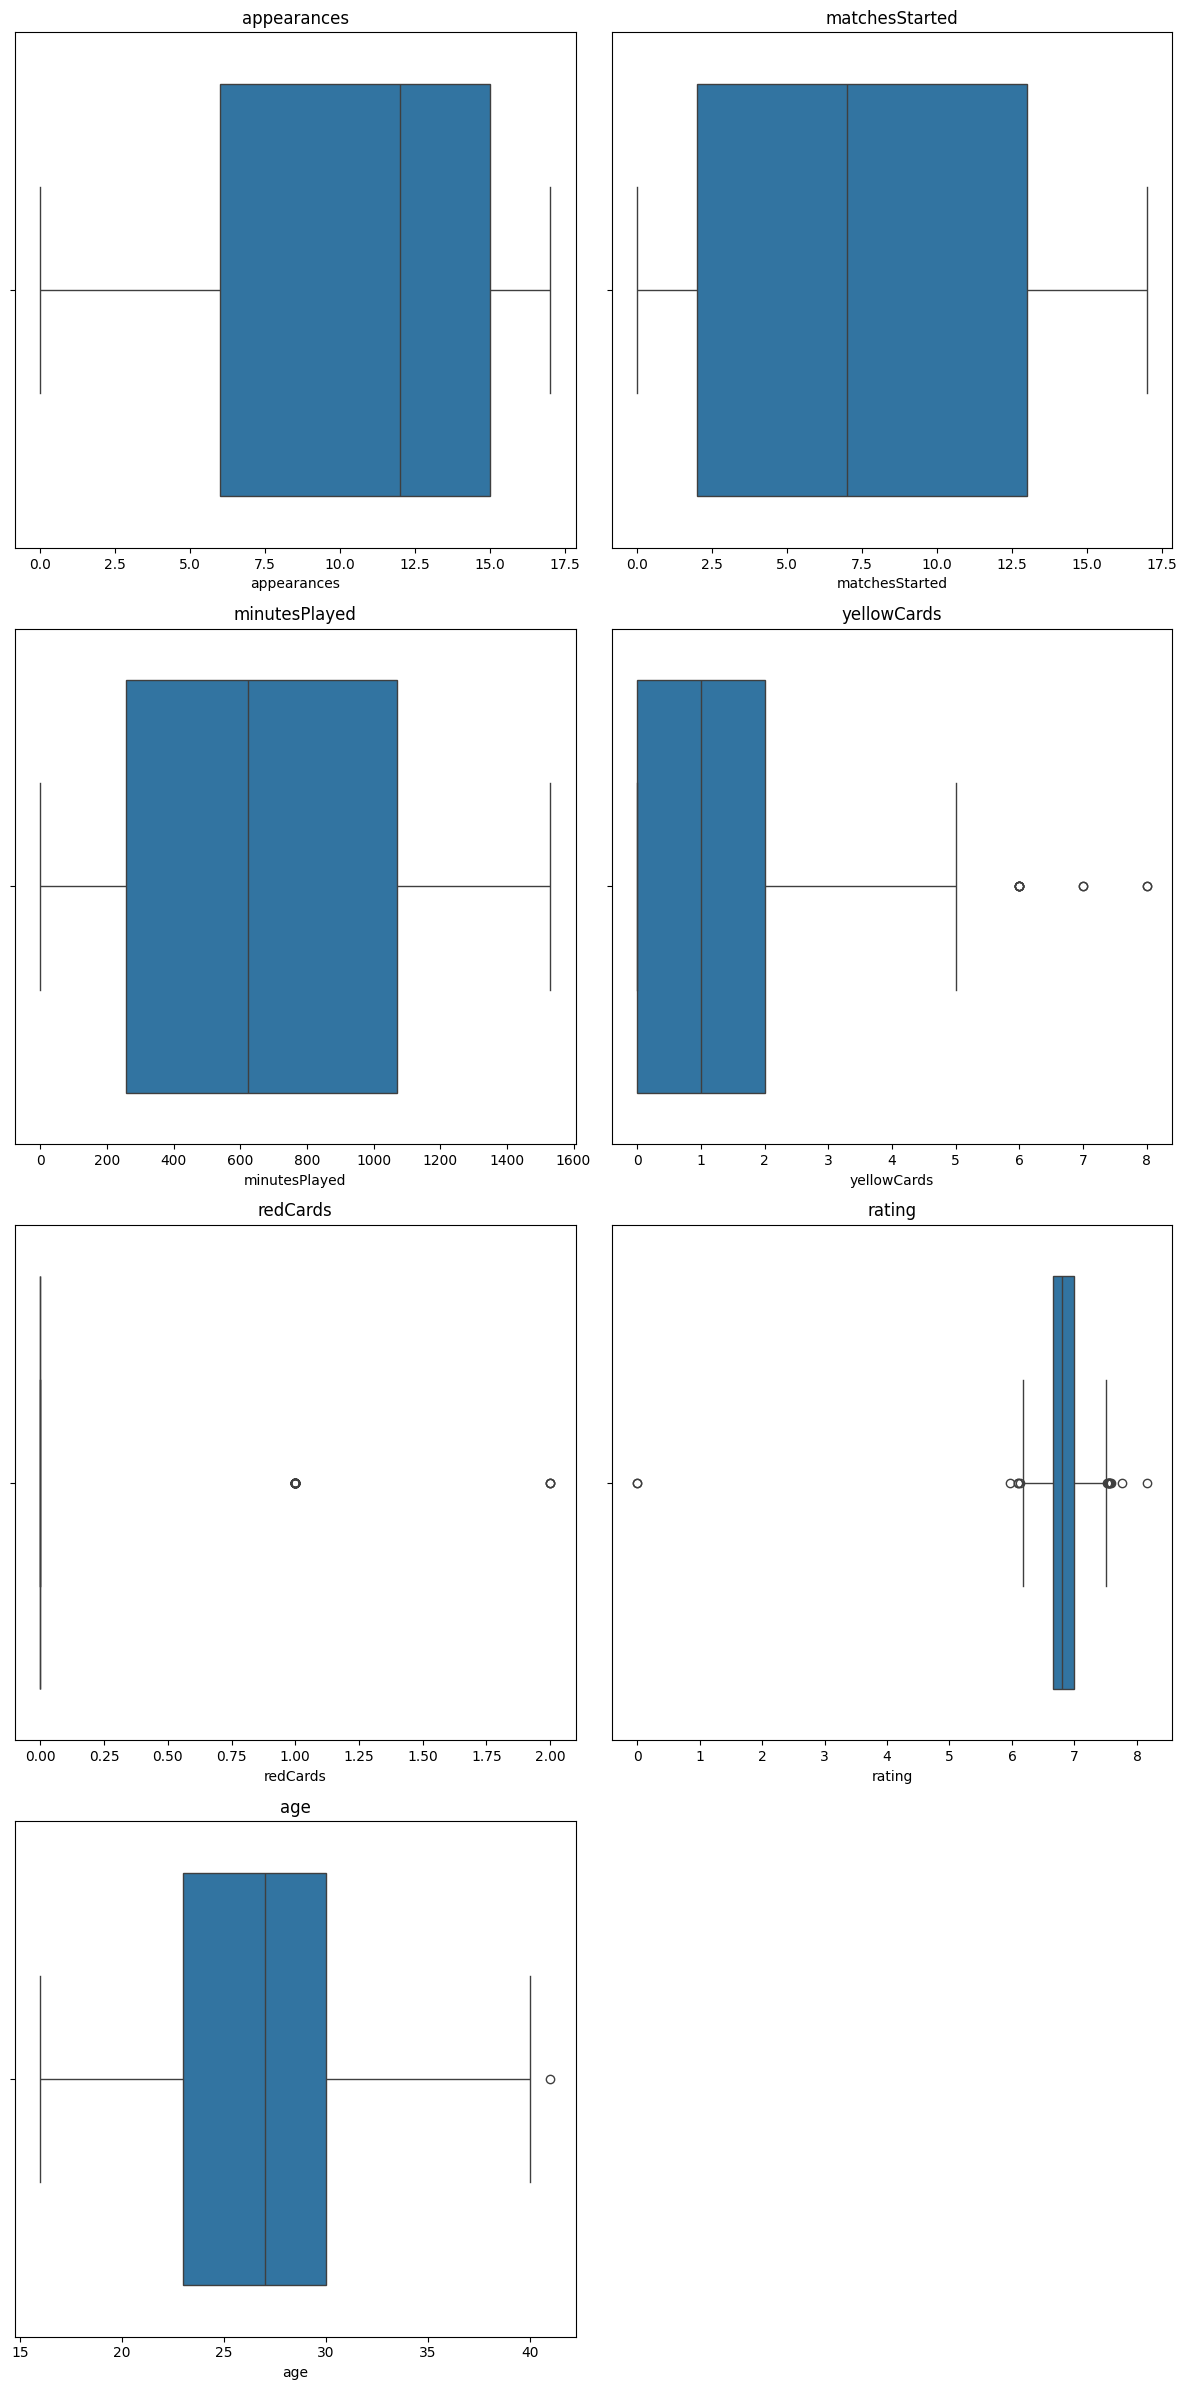

In [69]:
plot_multiple_boxplots(df_gen, numericas_gen) #boxplot de las numericas de general

In [9]:
plot_multiple_boxplots (df_atk, "totalShots", "goalConversion%")

NameError: name 'plot_multiple_boxplots' is not defined

In [72]:
variabilidad(df_gen)

,std,mean,CV
appearances,5.018888,10.476768,0.479049
matchesStarted,5.469525,7.377778,0.741351
minutesPlayed,455.897895,665.911111,0.684623
yellowCards,1.578458,1.634343,0.965806
redCards,0.302703,0.086869,3.484599
rating,0.512779,6.805980,0.075342
age,4.662790,26.822222,0.173841


<Axes: >

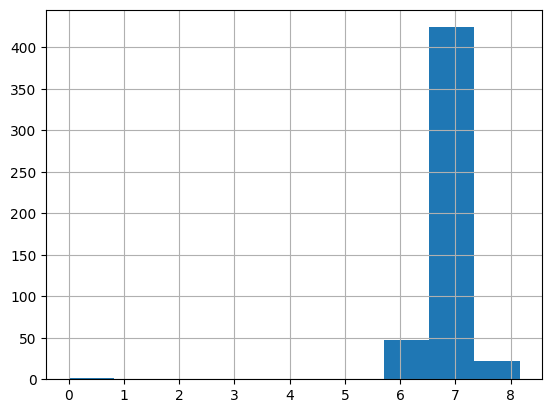

In [76]:
df_gen["rating"].hist() #histograma de nuestra variable principal

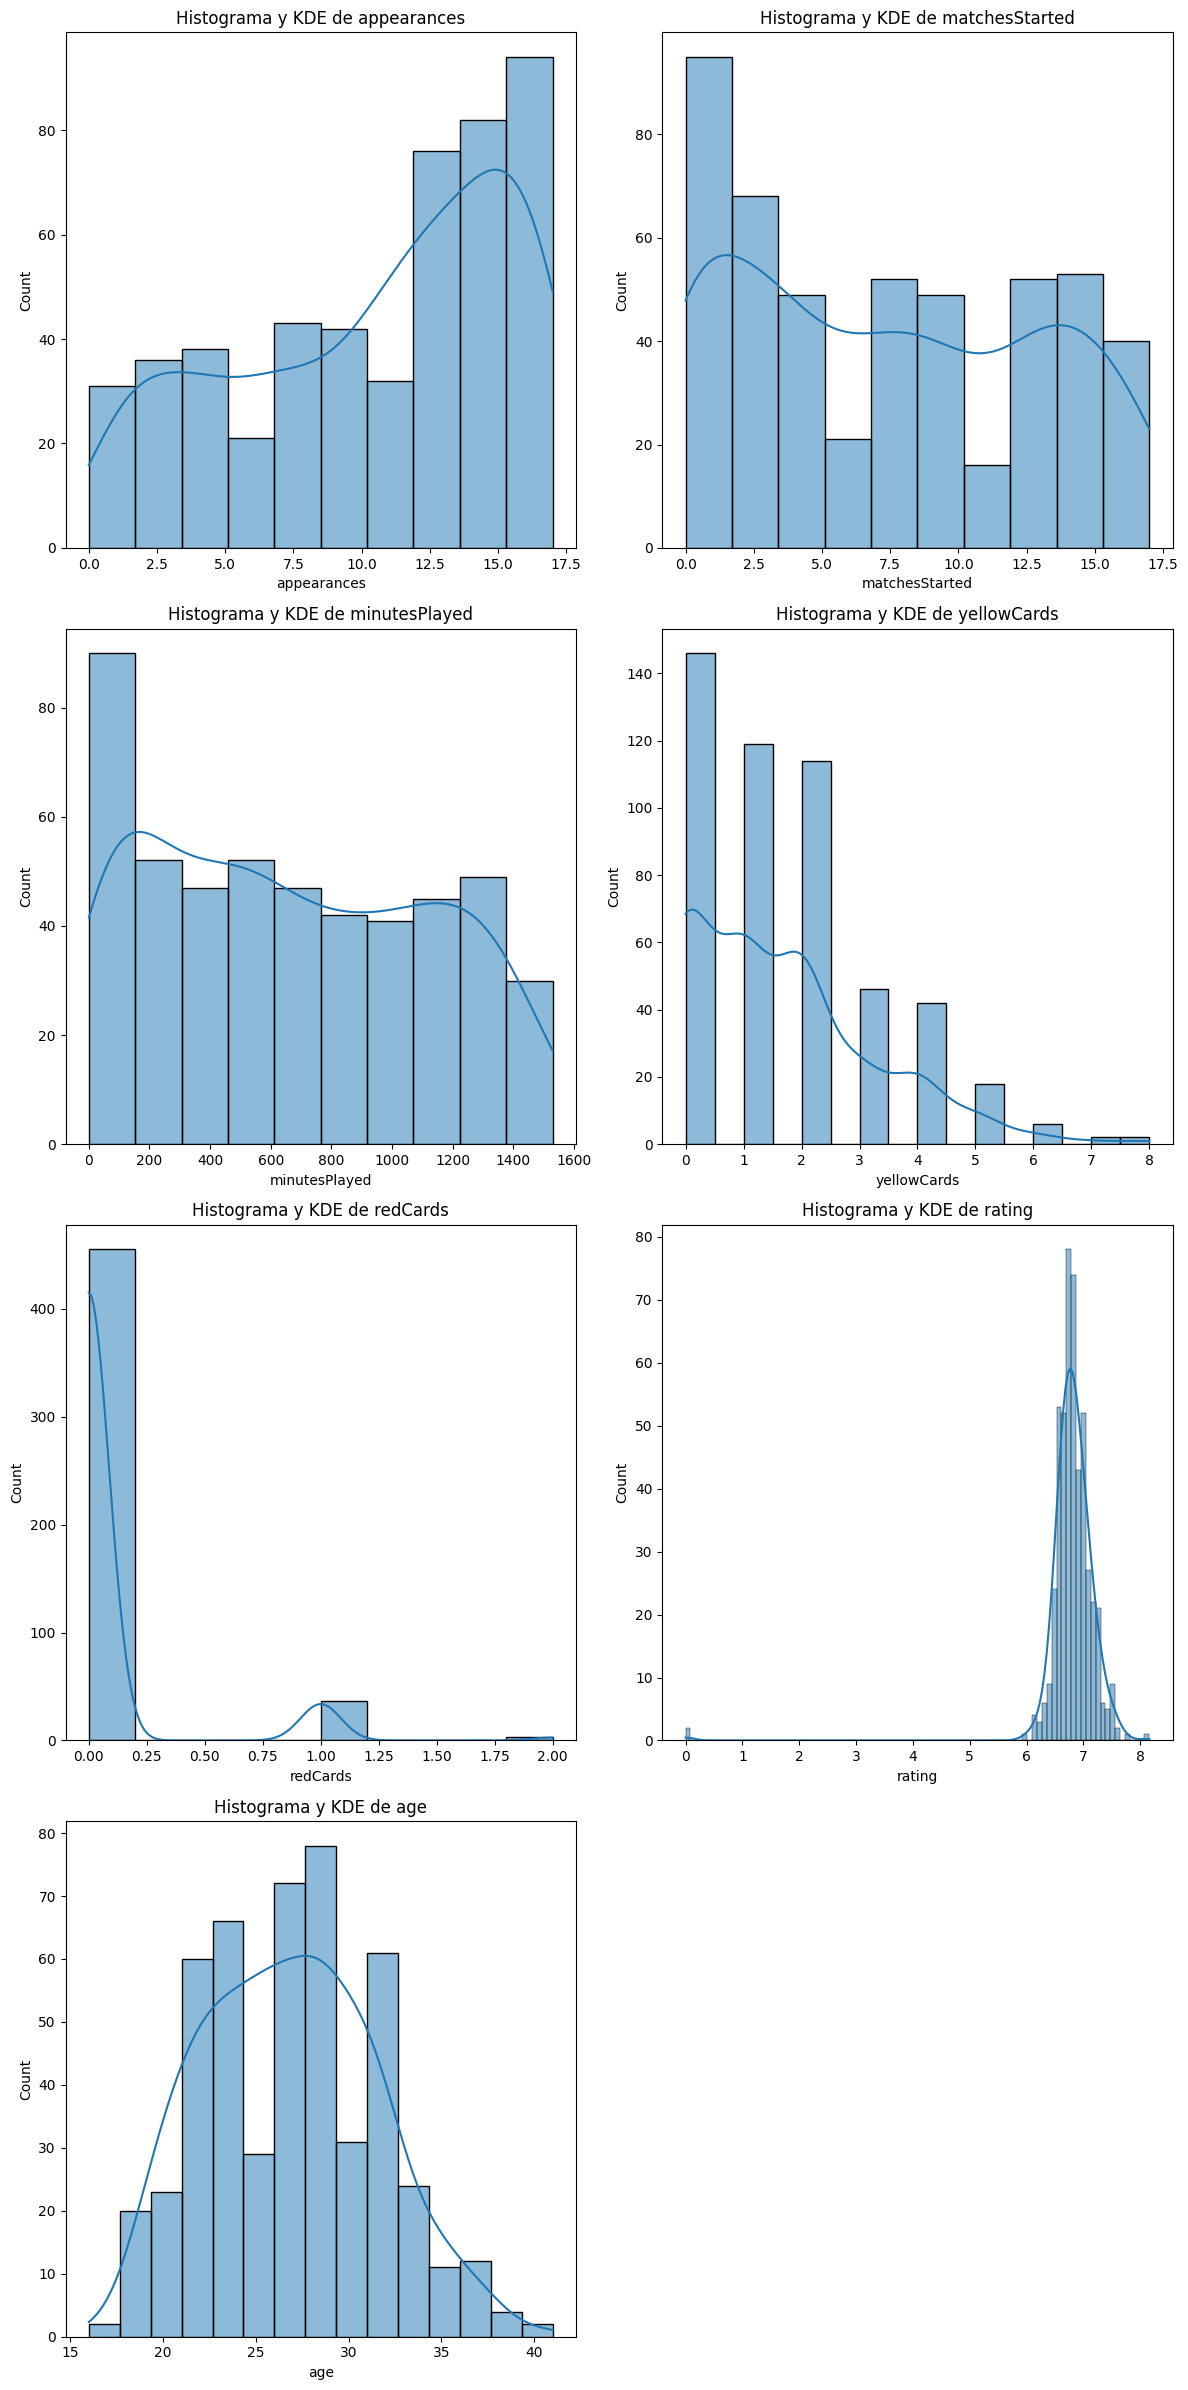

In [78]:
plot_histo_den(df_gen, numericas_gen) #histograma de la variables numericas

In [3]:
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            495 non-null    object 
 1   appearances     495 non-null    int64  
 2   matchesStarted  495 non-null    int64  
 3   minutesPlayed   495 non-null    int64  
 4   yellowCards     495 non-null    int64  
 5   redCards        495 non-null    int64  
 6   rating          495 non-null    float64
 7   team            495 non-null    object 
 8   age             495 non-null    int64  
 9   ageCategory     495 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 38.8+ KB


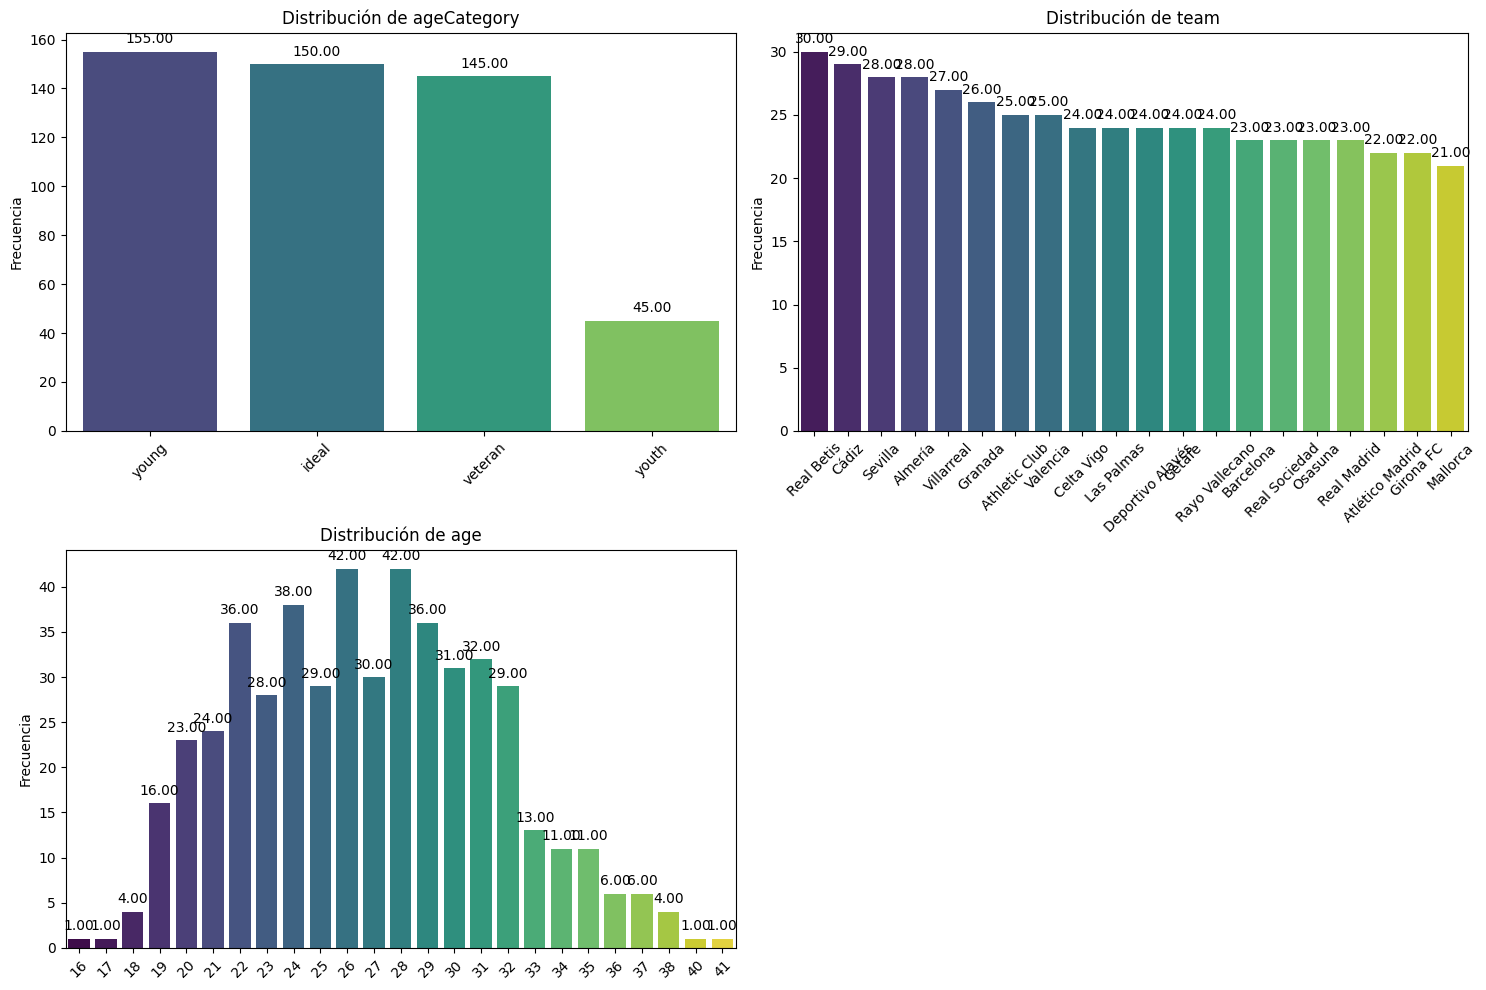

In [10]:
pinta_distribucion_categoricas(df_gen, ["ageCategory","team","age"], mostrar_valores=True) #pinta las categoricas de general

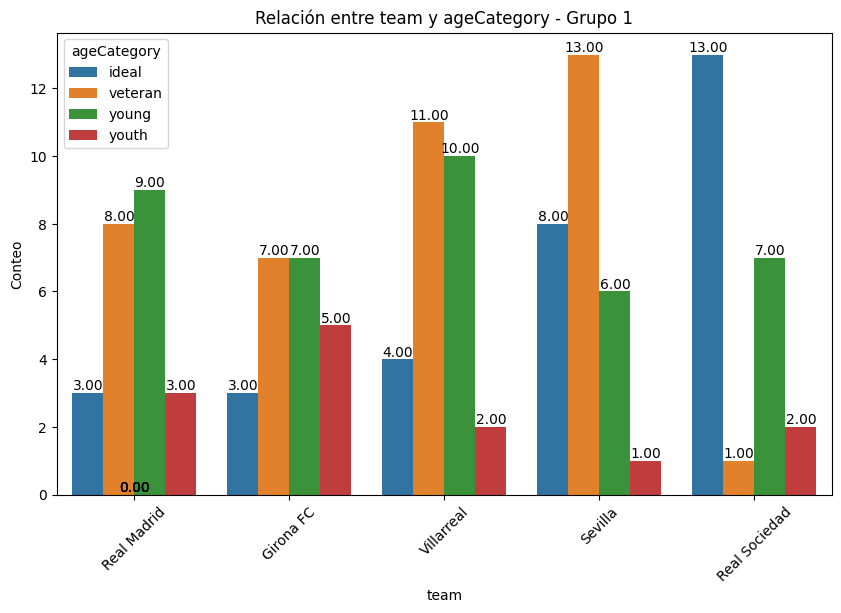

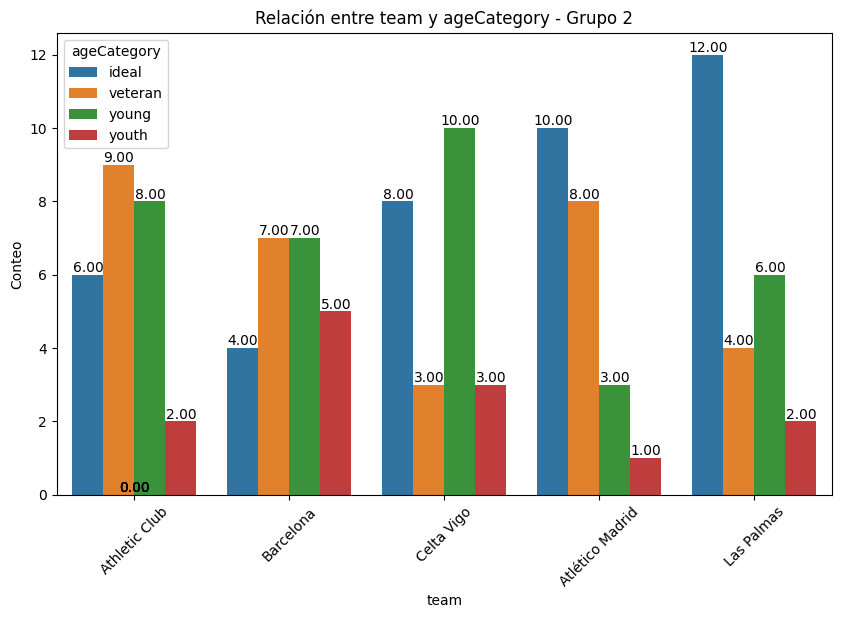

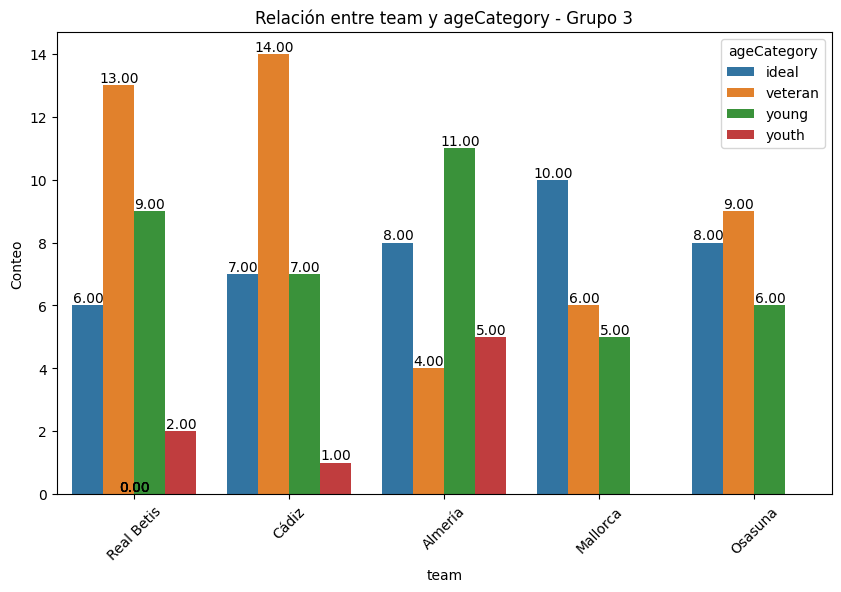

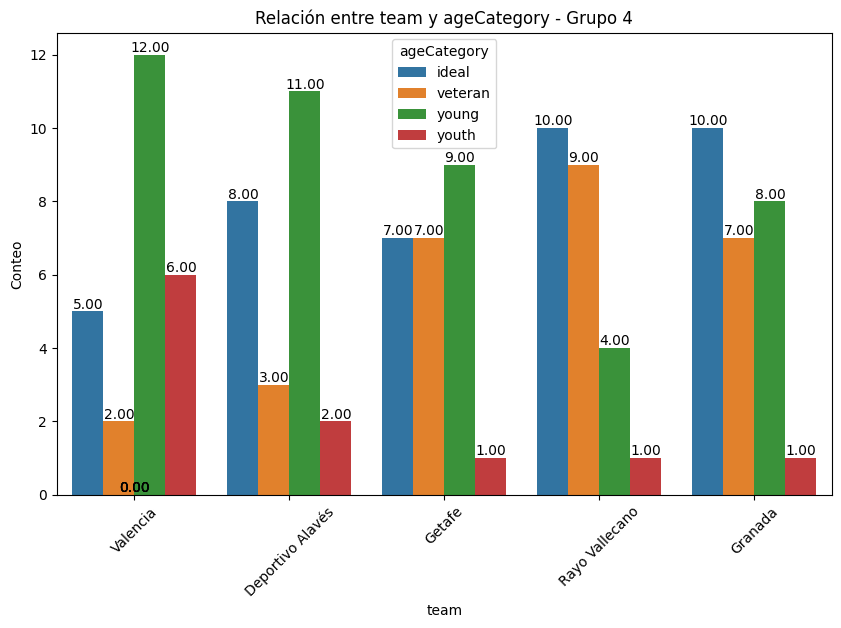

In [16]:
plot_categorical_relationship_fin(df_gen, "team", "ageCategory",  show_values=True) #muestra la relacion de categoria de edad para cada equipo.

### Analizaremos las 2 variables mas importantes para las hipotesis, categoria de edad y rating. ###

(2,)


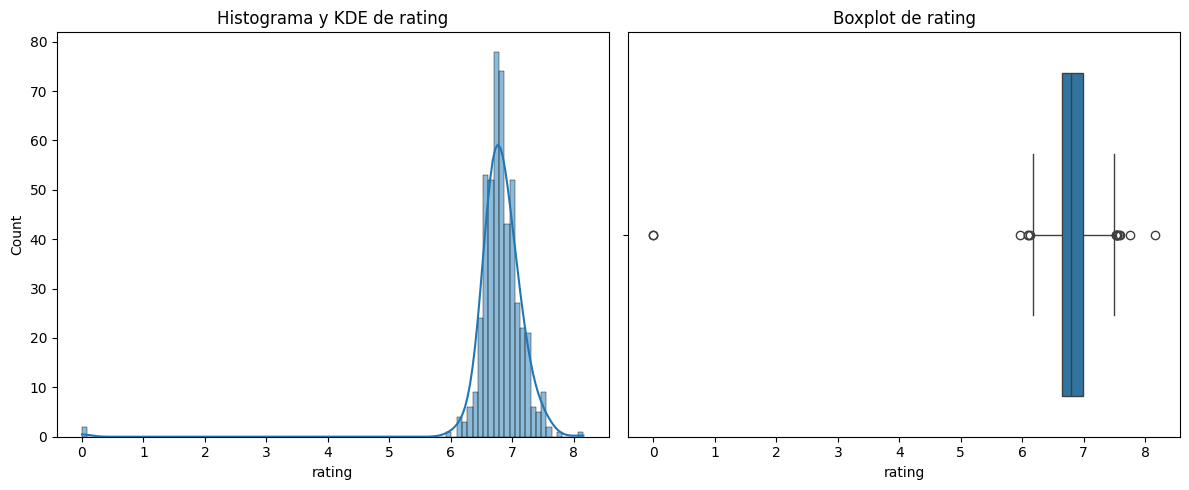

In [18]:
plot_combined_graphs(df_gen, ["rating"])

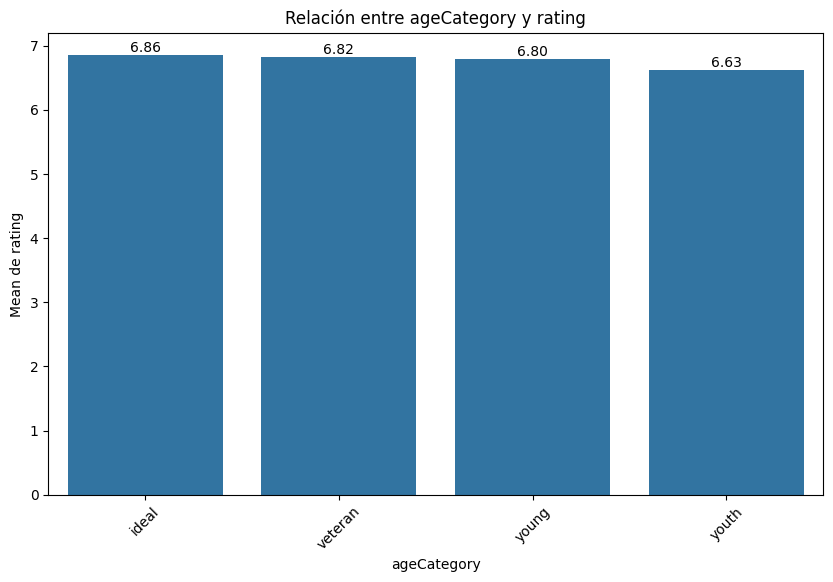

In [22]:
plot_categorical_numerical_relationship(df_gen, "ageCategory",  "rating", show_values=True) #el grafico que responde a la hipotesis principal.

### Ahora revisaremos el comportamiento de las tarjetas y estadisticas afin por categoria de edad ###

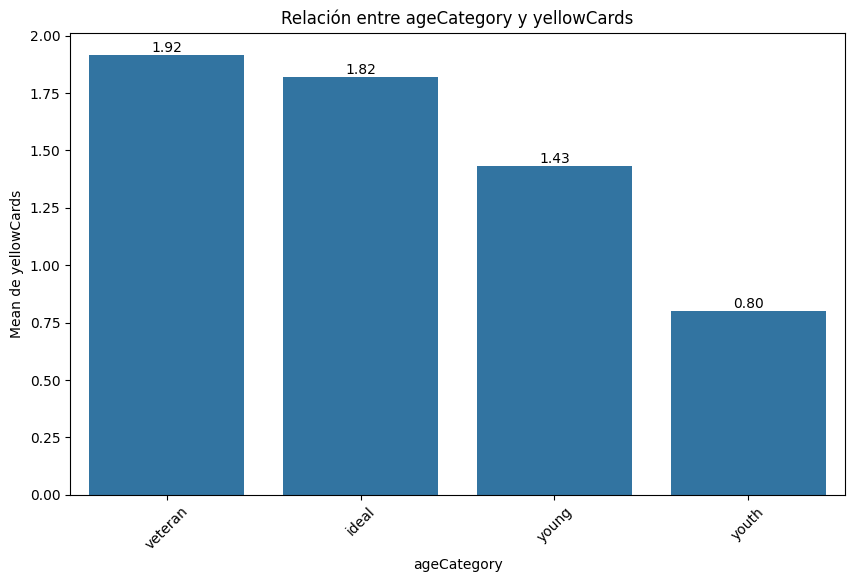

In [57]:
plot_categorical_numerical_relationship(df_gen, "ageCategory",  "yellowCards", show_values=True)

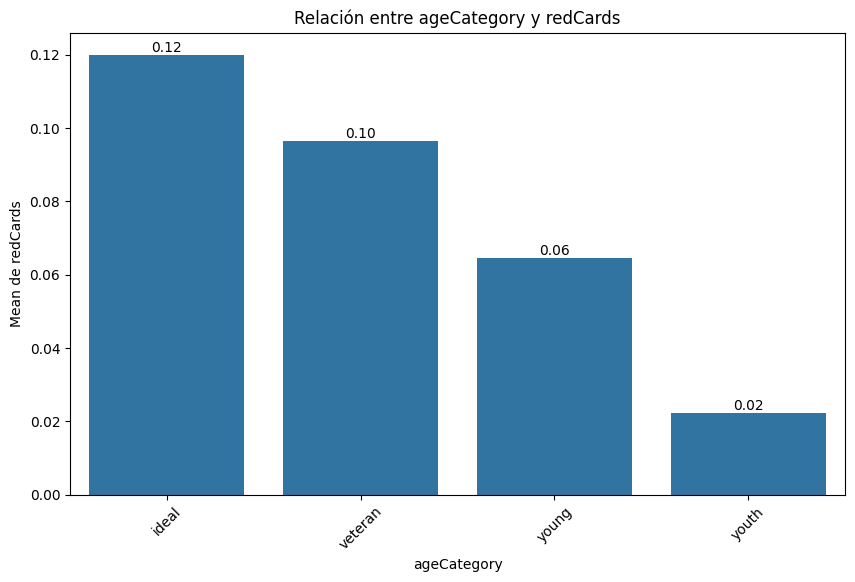

In [58]:
plot_categorical_numerical_relationship(df_gen, "ageCategory",  "redCards", show_values=True)

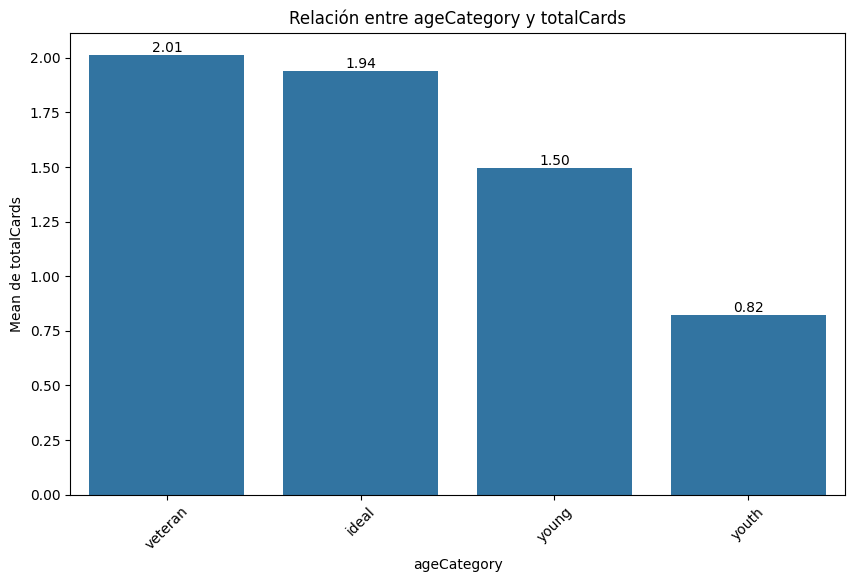

In [67]:
plot_categorical_numerical_relationship(df_gen, "ageCategory",  "totalCards", show_values=True)

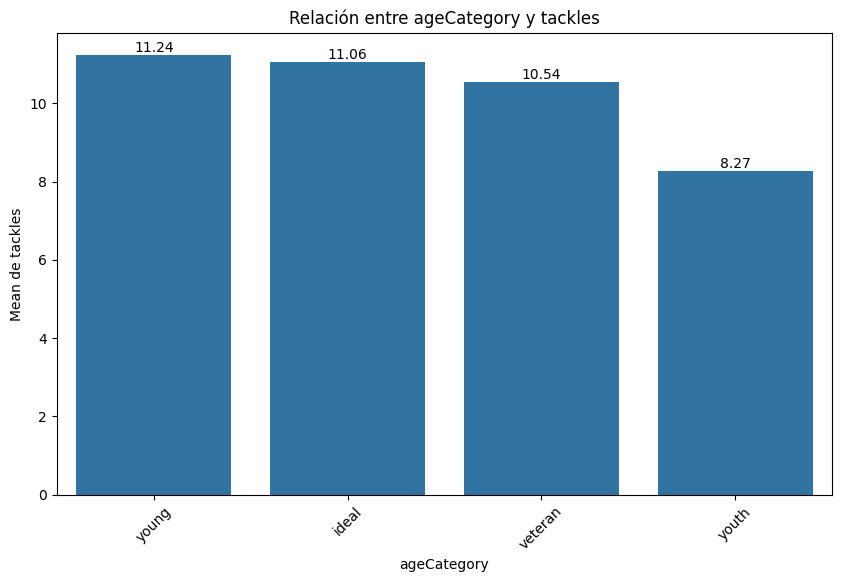

In [62]:
plot_categorical_numerical_relationship(df_def, "ageCategory",  "tackles", show_values=True)

### Confirmaremos que categoria de edad concreta mas goles ###


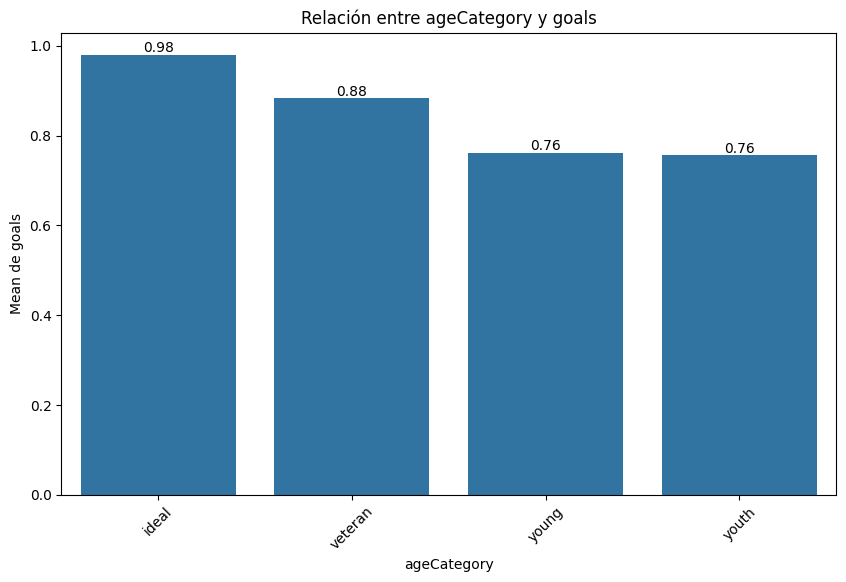

In [108]:
plot_categorical_numerical_relationship(df_atk, "ageCategory",  "goals", show_values=True)

 ### Confirmaremos que categoria de edad juega mas partidos y minutos en promedio ###

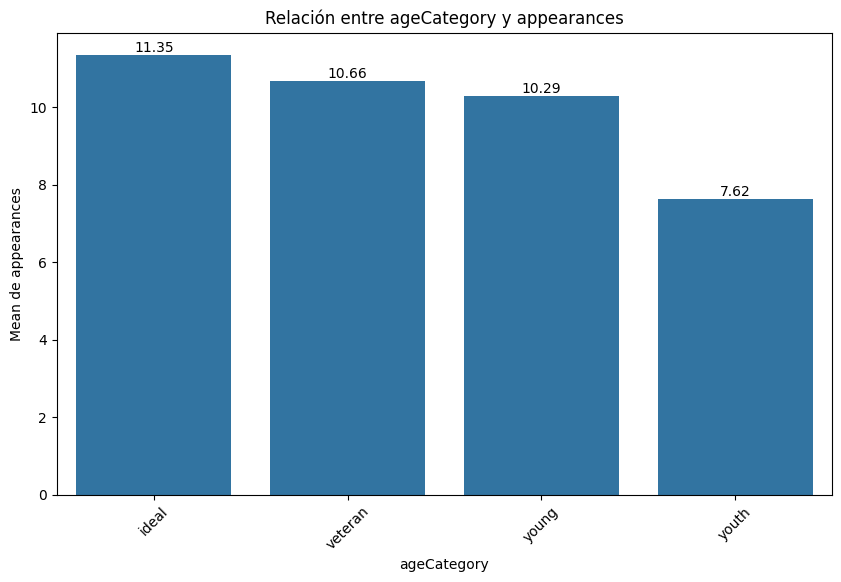

In [21]:
plot_categorical_numerical_relationship(df_gen, "ageCategory",  "appearances", show_values=True)

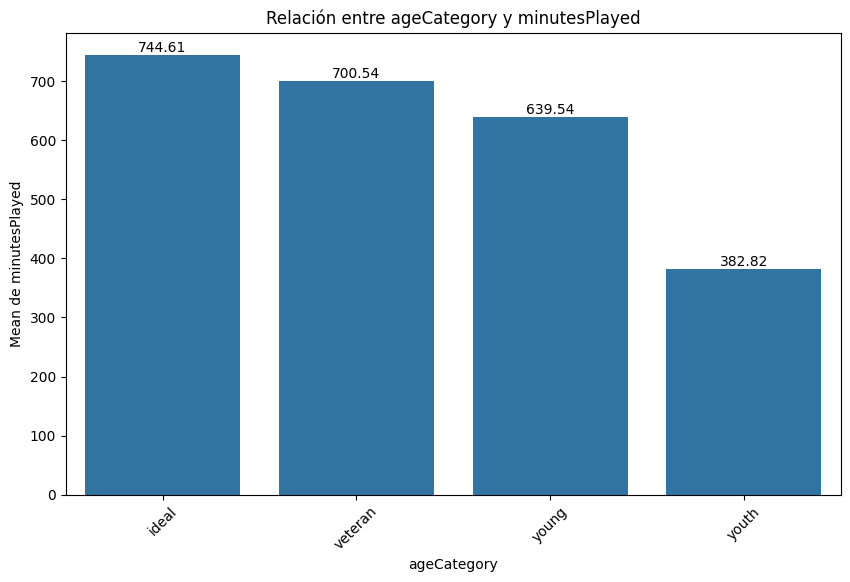

In [23]:
plot_categorical_numerical_relationship(df_gen, "ageCategory",  "minutesPlayed", show_values=True)

### Confirmaremos que categoria de edad posee mas asistencias ###

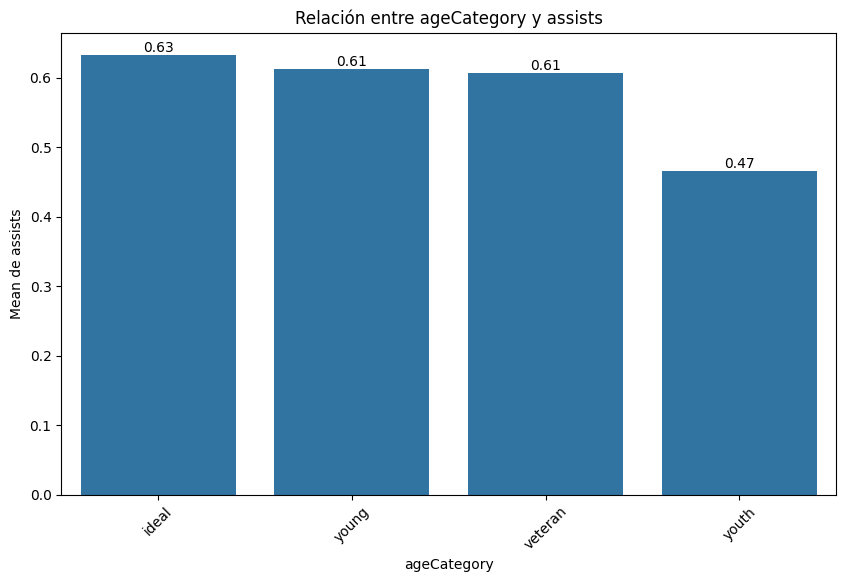

In [119]:
plot_categorical_numerical_relationship(df_pas, "ageCategory",  "assists", show_values=True)

## Realizaremos los boxplots de lo revisado previamente ##

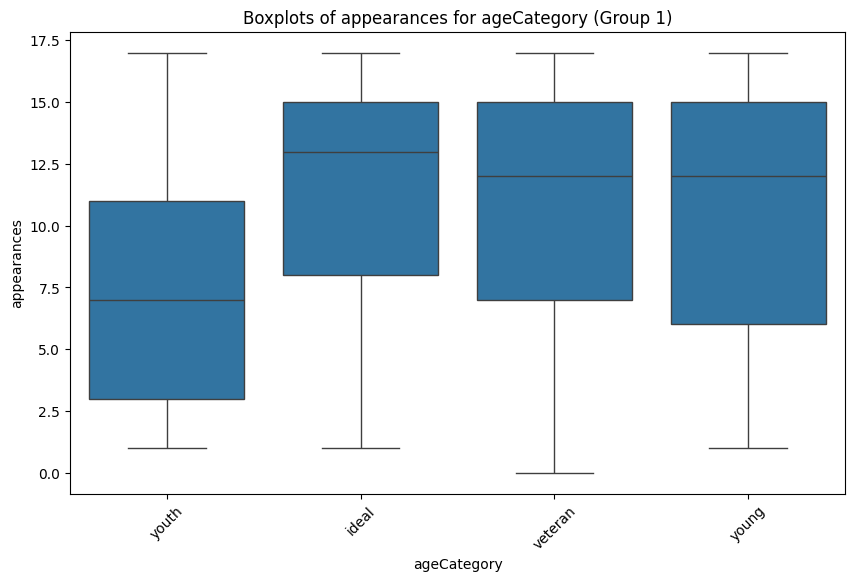

In [22]:
plot_grouped_boxplots(df_gen, "ageCategory", "appearances")

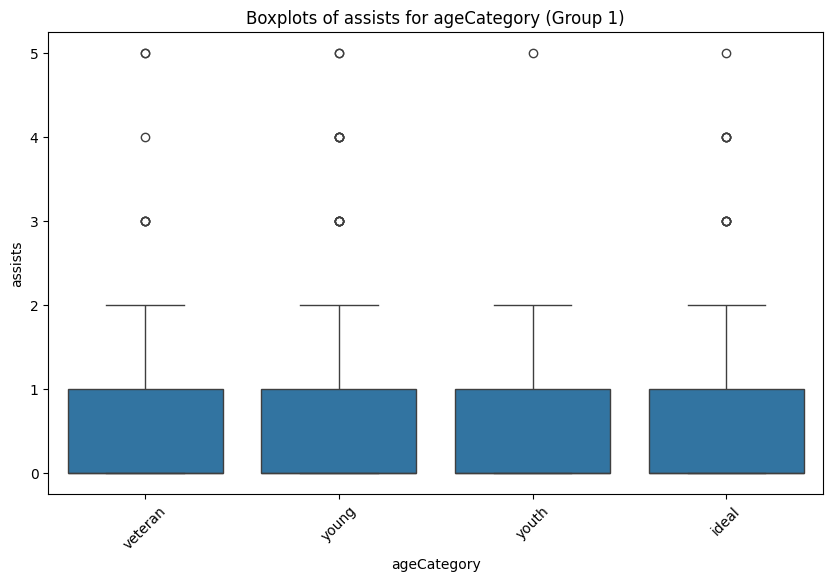

In [120]:
plot_grouped_boxplots(df_pas, "ageCategory", "assists")

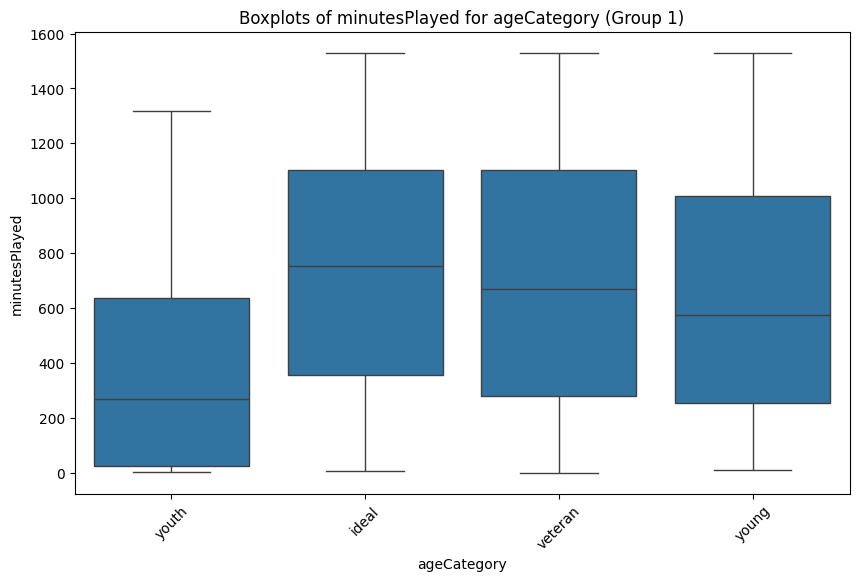

In [24]:
plot_grouped_boxplots(df_gen, "ageCategory", "minutesPlayed")

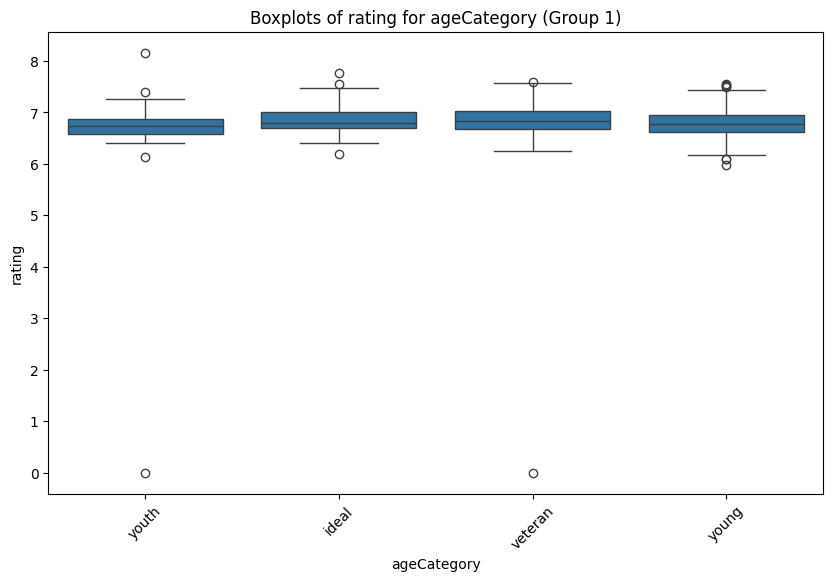

In [23]:
plot_grouped_boxplots(df_gen, "ageCategory", "rating")

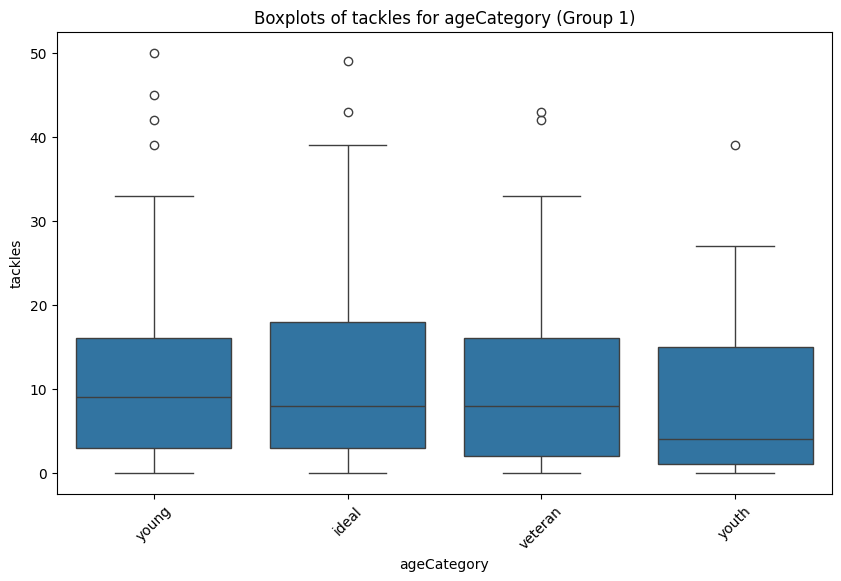

In [19]:
plot_grouped_boxplots(df_def, "ageCategory", "tackles")

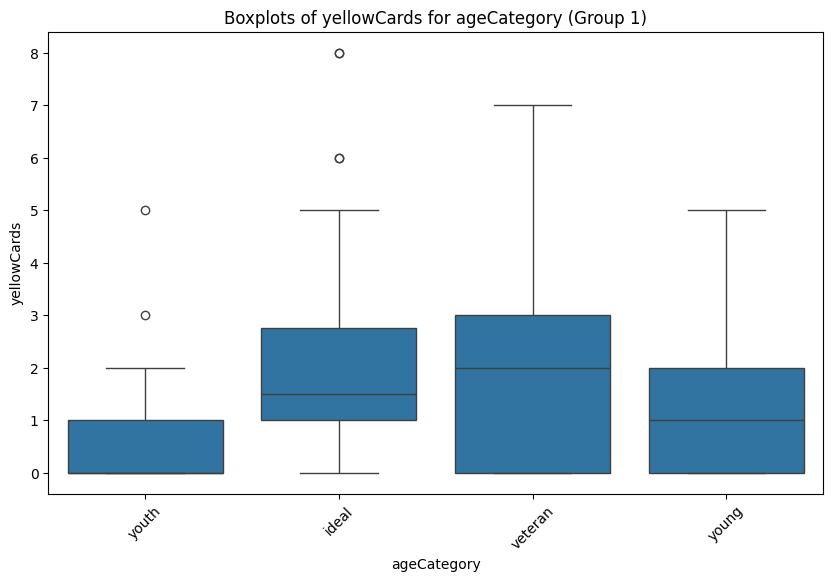

In [59]:
plot_grouped_boxplots(df_gen, "ageCategory", "yellowCards")

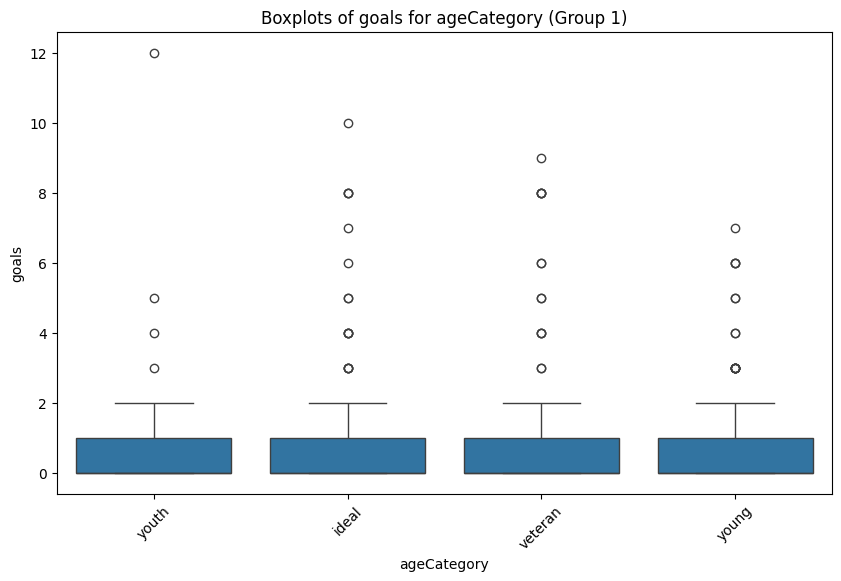

In [109]:
plot_grouped_boxplots(df_atk, "ageCategory", "goals")

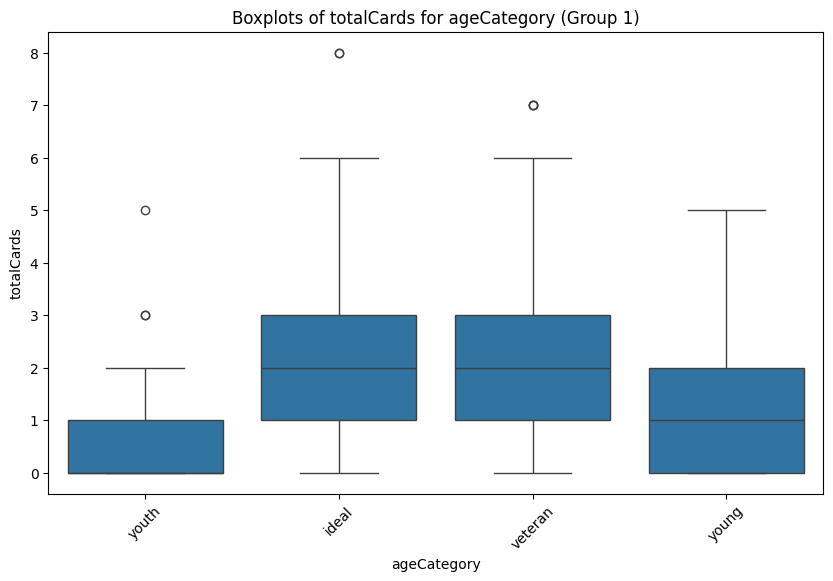

In [75]:
plot_grouped_boxplots(df_gen, "ageCategory", "totalCards")

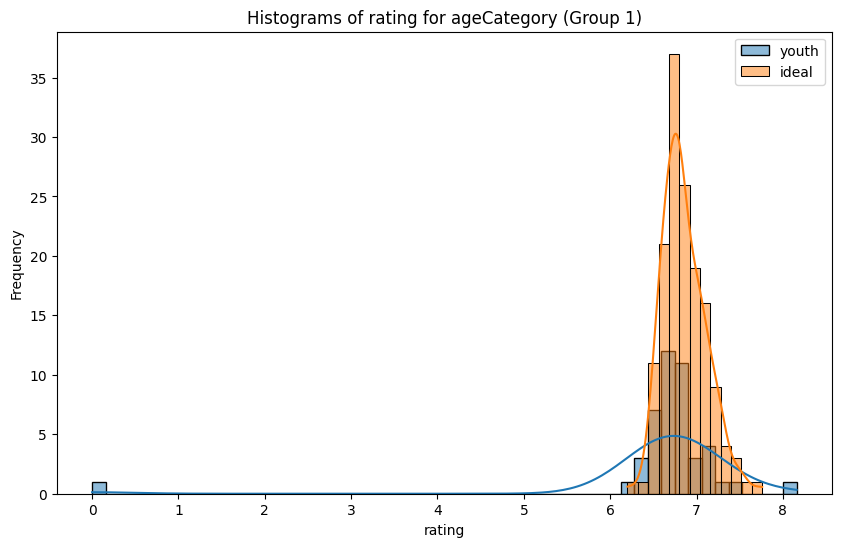

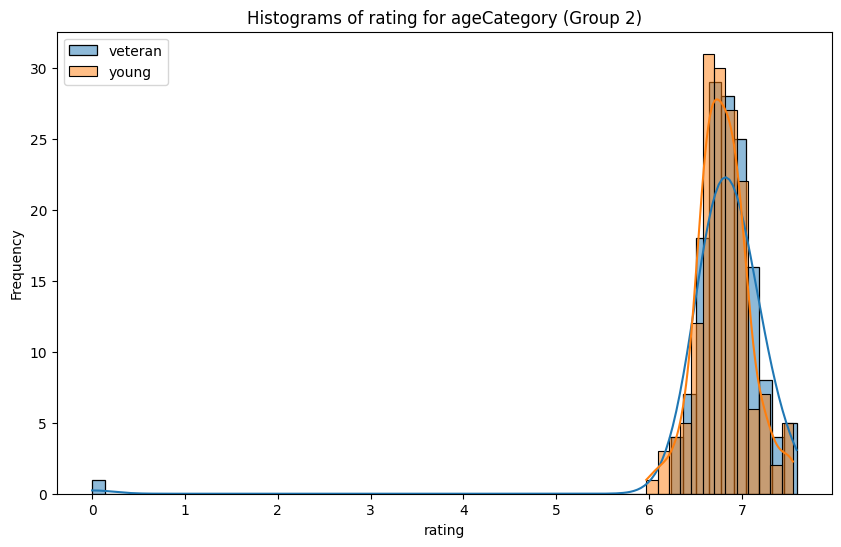

In [77]:
plot_grouped_histograms(df_gen, "ageCategory", "rating", 2)

### Ahora veremos la comparacion de edad (en vez de categoria de edad) con rating ###

(2,)


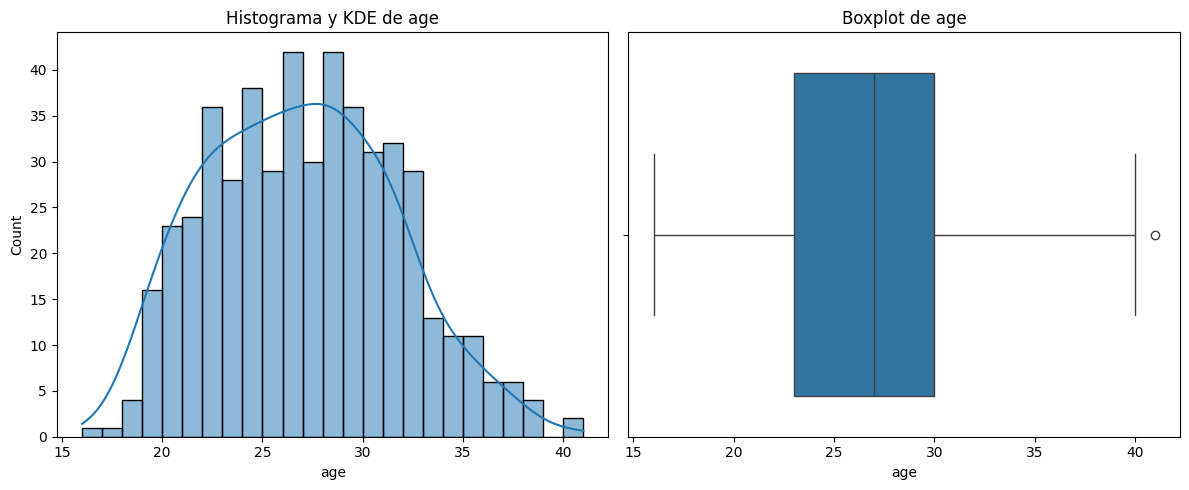

In [35]:
plot_combined_graphs(df_gen,["age"], bins= 25)

(2,)


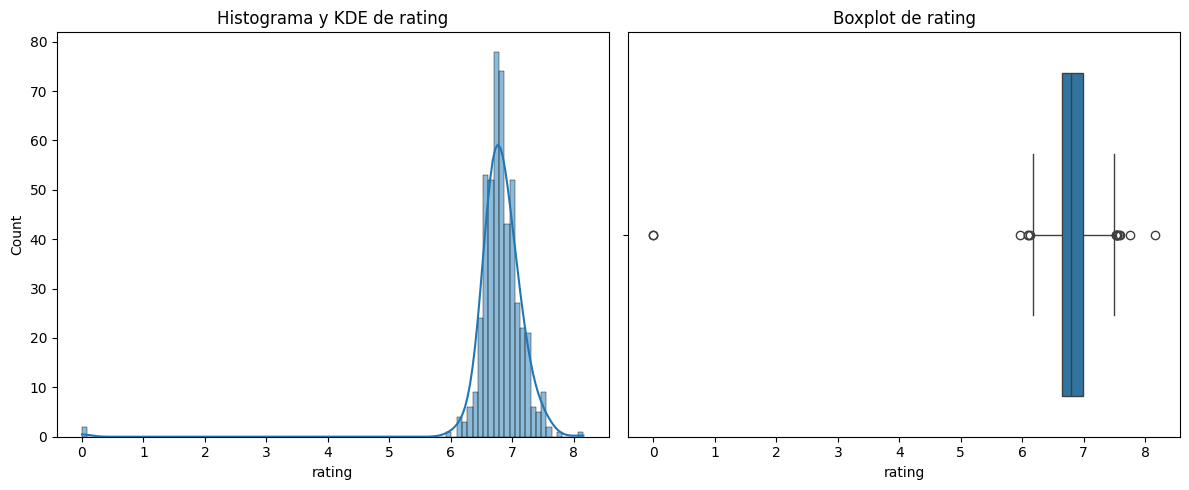

In [34]:
plot_combined_graphs(df_gen,["rating"])

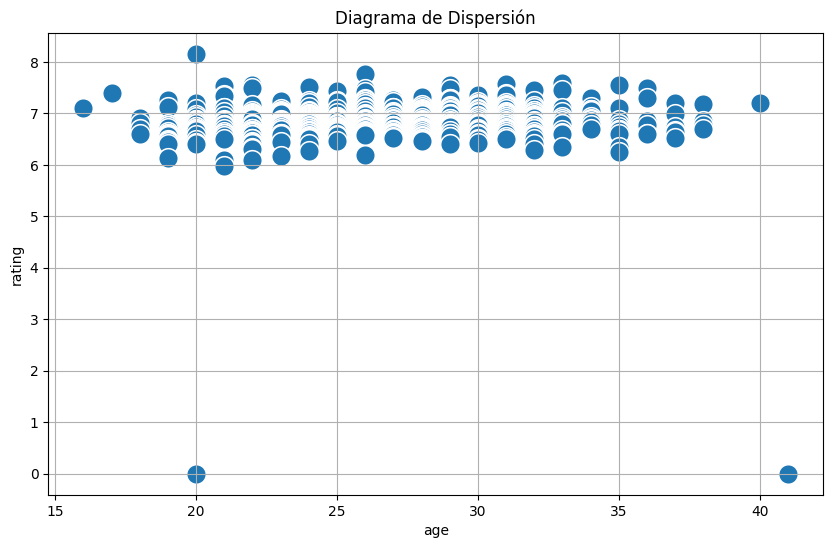

In [16]:
grafico_dispersion_con_correlacion(df_gen, "age", "rating", 200)

### Probaremos sacar la correlacion estadistica entre las variables relevantes ###

In [41]:
df_gen[["age", "rating"]].corr()

,age,rating
age,1.000000,0.022111
rating,0.022111,1.000000


In [42]:
from scipy.stats import pearsonr
pearsonr(df_gen["age"], df_gen["rating"])

PearsonRResult(statistic=0.02211094563471601, pvalue=0.623600609233122)

In [47]:
tabla_contingencia = pd.crosstab(df_gen["team"], df_gen["ageCategory"])
tabla_contingencia

ageCategory,ideal,veteran,young,youth
team,,,,
Almería,8,4,11,5
Athletic Club,6,9,8,2
Atlético Madrid,10,8,3,1
Barcelona,4,7,7,5
Celta Vigo,8,3,10,3
Cádiz,7,14,7,1
Deportivo Alavés,8,3,11,2
Getafe,7,7,9,1
Girona FC,3,7,7,5


In [49]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print ("valor chi2:", chi2)
print("P-value:", p)
print("grados de libertad:", dof)
print("tabla de frecuencias esperadas:\n", expected)

valor chi2: 92.1049182729037
P-value: 0.00222750301935257
grados de libertad: 57
tabla de frecuencias esperadas:
 [[8.48484848 8.2020202  8.76767677 2.54545455]
 [7.57575758 7.32323232 7.82828283 2.27272727]
 [6.66666667 6.44444444 6.88888889 2.        ]
 [6.96969697 6.73737374 7.2020202  2.09090909]
 [7.27272727 7.03030303 7.51515152 2.18181818]
 [8.78787879 8.49494949 9.08080808 2.63636364]
 [7.27272727 7.03030303 7.51515152 2.18181818]
 [7.27272727 7.03030303 7.51515152 2.18181818]
 [6.66666667 6.44444444 6.88888889 2.        ]
 [7.87878788 7.61616162 8.14141414 2.36363636]
 [7.27272727 7.03030303 7.51515152 2.18181818]
 [6.36363636 6.15151515 6.57575758 1.90909091]
 [6.96969697 6.73737374 7.2020202  2.09090909]
 [7.27272727 7.03030303 7.51515152 2.18181818]
 [9.09090909 8.78787879 9.39393939 2.72727273]
 [6.96969697 6.73737374 7.2020202  2.09090909]
 [6.96969697 6.73737374 7.2020202  2.09090909]
 [8.48484848 8.2020202  8.76767677 2.54545455]
 [7.57575758 7.32323232 7.82828283 2.272

In [75]:
from scipy import stats

In [53]:
grupos = df_gen["ageCategory"].unique()
rating_por_grupo = [df_gen[df_gen["ageCategory"] == grupo]["rating"] for grupo in grupos]
rating_por_grupo

[0      8.16
 17     7.40
 32     7.26
 47     7.21
 61     7.13
 76     7.11
 80     7.09
 145    6.96
 163    6.93
 167    6.92
 191    6.87
 195    6.87
 199    6.86
 203    6.86
 225    6.83
 233    6.81
 244    6.80
 252    6.80
 261    6.79
 291    6.75
 294    6.75
 302    6.74
 310    6.73
 315    6.72
 328    6.70
 333    6.70
 337    6.70
 349    6.68
 368    6.65
 377    6.63
 407    6.60
 411    6.60
 413    6.60
 418    6.59
 422    6.59
 432    6.57
 461    6.48
 462    6.48
 464    6.47
 468    6.45
 470    6.42
 476    6.40
 477    6.40
 489    6.13
 494    0.00
 Name: rating, dtype: float64,
 1      7.76
 6      7.55
 11     7.48
 12     7.48
 16     7.41
        ... 
 459    6.50
 463    6.48
 466    6.46
 474    6.40
 487    6.20
 Name: rating, Length: 150, dtype: float64,
 2      7.59
 3      7.57
 4      7.55
 10     7.49
 13     7.46
        ... 
 479    6.35
 480    6.35
 484    6.28
 486    6.25
 493    0.00
 Name: rating, Length: 145, dtype: float64,
 5      7.

In [54]:
f_val, p_val = stats.f_oneway(*rating_por_grupo)
print("valor f:", f_val)
print("valor p:", p_val) #el P value es mayor a 0,05 

valor f: 2.416720659771954
valor p: 0.06565847172325213


### A partir de ahora extraeremos datos interesantes (tablas, posiciones etc) para la presentacion ### 

In [66]:
df_gen_veteranos=df_gen[df_gen["ageCategory"] == "veteran"].copy()
df_gen_veteranos #creamos un df de veteranos

,name,appearances,matchesStarted,minutesPlayed,yellowCards,redCards,rating,team,age,ageCategory,totalCards
2,Toni Kroos,16,10,974,2,0,7.59,Real Madrid,33,veteran,2
3,Gerard Moreno,14,13,1081,0,0,7.57,Villarreal,31,veteran,0
4,Ivan Rakitić,15,14,1268,5,0,7.55,Sevilla,35,veteran,5
10,Iago Aspas,17,15,1274,4,1,7.49,Celta Vigo,36,veteran,5
13,Antoine Griezmann,16,16,1309,3,0,7.46,Atlético Madrid,32,veteran,3
...,...,...,...,...,...,...,...,...,...,...,...
479,Fernando Martínez,2,2,180,0,0,6.35,Almería,33,veteran,0
480,Raúl Fernández,4,4,281,0,0,6.35,Granada,35,veteran,0
484,Aitor Fernández,4,3,280,2,0,6.28,Osasuna,32,veteran,2
486,Víctor Díaz,4,2,161,1,0,6.25,Granada,35,veteran,1


In [62]:
df_gen_noveles = df_gen[(df_gen["ageCategory"] == "youth") | (df_gen["ageCategory"] == "young")].copy()

df_gen_noveles

,name,appearances,matchesStarted,minutesPlayed,yellowCards,redCards,rating,team,age,ageCategory,totalCards
0,Jude Bellingham,14,14,1205,2,0,8.16,Real Madrid,20,youth,2
5,Takefusa Kubo,16,14,1240,1,0,7.55,Real Sociedad,22,young,1
7,Pedri,8,7,617,2,0,7.53,Barcelona,21,young,2
8,Andriy Lunin,6,6,540,0,0,7.52,Real Madrid,24,young,0
9,Rodrygo,16,13,1143,0,0,7.50,Real Madrid,22,young,0
...,...,...,...,...,...,...,...,...,...,...,...
489,Jhon Solís,3,0,32,0,0,6.13,Girona FC,19,youth,0
490,Gabri Veiga,1,0,17,0,0,6.10,Celta Vigo,21,young,0
491,Adria Miquel Bosch Sanchis,1,0,25,0,0,6.10,Granada,22,young,0
492,Robert Navarro,6,4,248,0,1,5.97,Cádiz,21,young,1


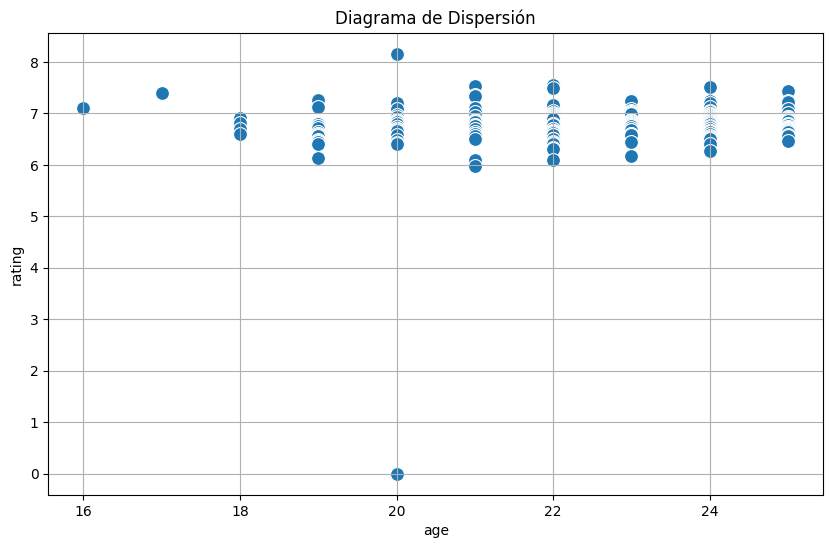

In [64]:
grafico_dispersion_con_correlacion(df_gen_noveles, "age", "rating", 100)

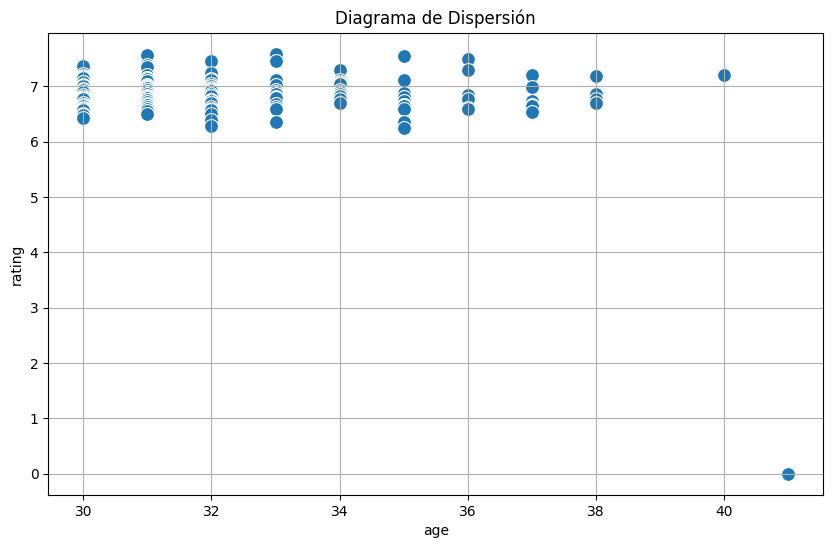

In [67]:
grafico_dispersion_con_correlacion(df_gen_veteranos, "age", "rating", 100)

In [70]:
vet=df_gen_veteranos.groupby('age')['rating'].mean()
vet= vet.sort_values(ascending = False)
vet.round(2)

age
40    7.20
34    6.96
36    6.94
33    6.90
31    6.89
38    6.88
30    6.86
32    6.83
37    6.80
35    6.75
41    0.00
Name: rating, dtype: float64

In [79]:
nov=df_gen_noveles.groupby('age')['rating'].mean()
nov= nov.sort_values(ascending = False)
nov.round(2)

age
17    7.40
16    7.11
23    6.84
25    6.83
24    6.81
21    6.79
18    6.76
22    6.72
19    6.64
20    6.54
Name: rating, dtype: float64

In [71]:
df_gen_veteranos[["age", "rating"]].corr()

,age,rating
age,1.000000,-0.266314
rating,-0.266314,1.000000


In [78]:
pearsonr(df_gen_veteranos["age"], df_gen_veteranos["rating"])

PearsonRResult(statistic=-0.2663139057688142, pvalue=0.0012046974001393182)

In [77]:
from scipy.stats import pearsonr
pearsonr(df_gen_noveles["age"], df_gen_noveles["rating"])

PearsonRResult(statistic=0.09584310923905646, pvalue=0.17700304130980377)

In [74]:
tabla_edades_media = pd.crosstab(df_gen["team"], df_gen["age"].mean())
tabla_edades_media = tabla_edades_media.sort_values

col_0,26.822222
team,
Almería,28
Athletic Club,25
Atlético Madrid,22
Barcelona,23
Celta Vigo,24
Cádiz,29
Deportivo Alavés,24
Getafe,24
Girona FC,22


In [14]:
df_gen_sorted=df_gen.sort_values(by='rating', ascending = False)
df_gen_sorted.tail(5)

,name,appearances,matchesStarted,minutesPlayed,yellowCards,redCards,rating,team,age,ageCategory
490,Gabri Veiga,1,0,17,0,0,6.10,Celta Vigo,21,young
491,Adria Miquel Bosch Sanchis,1,0,25,0,0,6.10,Granada,22,young
492,Robert Navarro,6,4,248,0,1,5.97,Cádiz,21,young
493,Pepe Reina,0,0,0,1,0,0.00,Villarreal,41,veteran
494,Moussa Diakité,1,0,1,0,0,0.00,Cádiz,20,youth


In [50]:
df_gen_sorted=df_gen.sort_values(by='totalCards', ascending = False)
df_gen_sorted.head(5)

,name,appearances,matchesStarted,minutesPlayed,yellowCards,redCards,rating,team,age,ageCategory,totalCards
438,Iván Alejo,15,13,984,8,0,6.55,Cádiz,28,ideal,8
228,Gerard Gumbau,16,16,1340,8,0,6.82,Granada,28,ideal,8
112,Antonio Rüdiger,15,14,1300,7,0,7.01,Real Madrid,30,veteran,7
358,Djené,15,13,1066,6,1,6.67,Getafe,31,veteran,7
166,Rubén Alcaraz,15,15,1262,7,0,6.92,Cádiz,32,veteran,7


In [51]:
df_rating = df_gen_sorted[["name", "totalCards", "ageCategory"]]
df_rating.head(10)

,name,totalCards,ageCategory
438,Iván Alejo,8,ideal
228,Gerard Gumbau,8,ideal
112,Antonio Rüdiger,7,veteran
358,Djené,7,veteran
166,Rubén Alcaraz,7,veteran
255,Igor Zubeldia,6,ideal
439,Rubén Sobrino,6,veteran
216,Robin Le Normand,6,ideal
210,Alejandro Catena,6,ideal
229,Nemanja Gudelj,6,veteran


In [ ]:
df_tarjetas = df_def_sorted[["name", "rating", "ageCategory"]]
df_rating.head(10)

In [20]:
df_def_sorted=df_def.sort_values(by='tackles', ascending = False)
df_def_sorted.head(5)

,name,tackles,interceptions,clearances,errorLeadToGoal,team,age,ageCategory
0,Sergi Cardona,50,27,43,0,Las Palmas,24,young
1,Óscar Valentín,49,12,22,1,Rayo Vallecano,29,ideal
2,Samuel Costa,45,23,27,0,Mallorca,23,young
3,José Luis Gayà,43,4,18,0,Valencia,28,ideal
4,Alfonso Espino,43,18,28,0,Rayo Vallecano,31,veteran


In [25]:
df_gen_youth=df_gen[df_gen["ageCategory"] == "youth"].copy()
df_gen_youth

,name,appearances,matchesStarted,minutesPlayed,yellowCards,redCards,rating,team,age,ageCategory,totalCards
0,Jude Bellingham,14,14,1205,2,0,8.16,Real Madrid,20,youth,2
17,Marc Guiu,1,0,11,1,0,7.40,Barcelona,17,youth,1
32,Sávio,16,16,1316,2,0,7.26,Girona FC,19,youth,2
47,Pablo Barrios,9,5,562,2,0,7.21,Atlético Madrid,20,youth,2
61,Gavi,12,10,943,5,0,7.13,Barcelona,19,youth,5
76,Lamine Yamal,17,7,766,1,0,7.11,Barcelona,16,youth,1
80,Juanlu Sánchez,10,7,638,2,0,7.09,Sevilla,20,youth,2
145,Alberto Moleiro,7,4,407,0,0,6.96,Las Palmas,20,youth,0
163,Marc Pubill,4,3,271,1,0,6.93,Almería,20,youth,1
167,Yarek Gasiorowski,7,2,269,1,0,6.92,Valencia,18,youth,1


In [58]:
youth_sorted=df_gen_youth.sort_values(by='minutesPlayed', ascending = False)
youth_sorted


,name,appearances,matchesStarted,minutesPlayed,yellowCards,redCards,rating,team,age,ageCategory,totalCards
32,Sávio,16,16,1316,2,0,7.26,Girona FC,19,youth,2
225,Javier Guerra,16,14,1295,2,1,6.83,Valencia,20,youth,3
0,Jude Bellingham,14,14,1205,2,0,8.16,Real Madrid,20,youth,2
291,Cristhian Mosquera,15,12,1184,1,0,6.75,Valencia,19,youth,1
195,Alejandro Balde,15,12,1108,1,0,6.87,Barcelona,20,youth,1
203,Chadi Riad,12,11,1014,0,0,6.86,Real Betis,20,youth,0
61,Gavi,12,10,943,5,0,7.13,Barcelona,19,youth,5
418,Samuel Omorodion,15,8,802,2,0,6.59,Deportivo Alavés,19,youth,2
76,Lamine Yamal,17,7,766,1,0,7.11,Barcelona,16,youth,1
199,Arnau Martínez,10,9,707,3,0,6.86,Girona FC,20,youth,3


In [57]:
team_mean=df_gen.groupby('team')['age'].mean()
team_mean= team_mean.sort_values()
team_mean.round(2)

team
Valencia            23.44
Almería             24.64
Real Sociedad       25.00
Deportivo Alavés    25.29
Celta Vigo          25.54
Barcelona           25.61
Girona FC           25.77
Las Palmas          26.58
Real Madrid         26.70
Getafe              26.83
Athletic Club       27.12
Granada             27.38
Real Betis          27.70
Villarreal          27.85
Mallorca            27.90
Cádiz               28.28
Osasuna             28.35
Atlético Madrid     28.55
Sevilla             28.71
Rayo Vallecano      28.79
Name: age, dtype: float64

In [98]:
rating_mean=df_gen.groupby('team')['rating'].mean()
rating_mean= rating_mean.sort_values(ascending=False)
rating_mean.round(2)

team
Real Madrid         7.11
Barcelona           7.11
Atlético Madrid     7.00
Girona FC           6.92
Sevilla             6.90
Las Palmas          6.89
Athletic Club       6.87
Real Betis          6.87
Real Sociedad       6.84
Mallorca            6.82
Celta Vigo          6.81
Osasuna             6.79
Rayo Vallecano      6.78
Getafe              6.77
Valencia            6.75
Deportivo Alavés    6.73
Almería             6.71
Granada             6.61
Villarreal          6.55
Cádiz               6.47
Name: rating, dtype: float64

In [40]:
youth_sorted.set_index("name", inplace = True)

In [41]:
youth_sorted["minutesPlayed"].head(5)

name
Sávio                 1316
Javier Guerra         1295
Jude Bellingham       1205
Cristhian Mosquera    1184
Alejandro Balde       1108
Name: minutesPlayed, dtype: int64

In [111]:
goles_sorted=df_atk.sort_values(by='goals', ascending = False)
goles_sorted.head(10)

,name,goals,xG,bigChancesMissed,successfulDribbles,totalShots,goalConversion%,team,age,ageCategory
0,Jude Bellingham,12,6.80,5,27,34,35.29,Real Madrid,20,youth
1,Borja Mayoral,10,7.73,5,14,32,31.25,Getafe,26,ideal
2,Antoine Griezmann,9,6.39,6,16,34,26.47,Atlético Madrid,32,veteran
3,Gerard Moreno,8,5.18,2,22,31,25.81,Villarreal,31,veteran
4,Iñaki Williams,8,5.40,5,31,50,16.00,Athletic Club,29,ideal
5,Ante Budimir,8,7.10,6,6,40,20.00,Osasuna,32,veteran
6,Artem Dovbyk,8,7.31,7,6,38,21.05,Girona FC,26,ideal
7,Gorka Guruzeta,8,6.44,4,9,33,24.24,Athletic Club,27,ideal
8,Robert Lewandowski,8,10.79,13,10,49,16.33,Barcelona,35,veteran
9,Álvaro Morata,8,6.58,10,13,37,21.62,Atlético Madrid,31,veteran


In [118]:
ass_sorted=df_pas.sort_values(by='assists', ascending = False)
ass_sorted= ass_sorted[["name","assists"]].head(10)
ass_sorted

,name,assists
20,Toni Kroos,5
37,Diego Rico,5
5,Sávio,5
6,Alejandro Baena,5
7,Saúl Ñíguez,5
13,Nico Williams,5
28,Mason Greenwood,4
19,Aleix García,4
36,Artem Dovbyk,4
27,Raphinha,4


In [94]:

data = {'Team': ['Almería', 'Athletic Club', 'Atlético Madrid', 'Barcelona', 'Celta Vigo', 'Cádiz', 'Deportivo Alavés',
                 'Getafe', 'Girona FC', 'Granada', 'Las Palmas', 'Mallorca', 'Osasuna', 'Rayo Vallecano', 'Real Betis',
                 'Real Madrid', 'Real Sociedad', 'Sevilla', 'Valencia', 'Villarreal'],
        'AgeAverage': [24.64, 27.12, 28.55, 25.61, 25.54, 28.28, 25.29, 26.83, 25.77, 27.38, 26.58, 27.90, 28.35, 28.79, 27.70, 26.70, 25.00, 28.71, 23.44, 27.85],
        'Position': [20, 5, 4, 3, 17, 18, 13, 8, 1, 19, 9, 15, 12, 11, 7, 2, 6, 16, 10, 14]}
df_teams = pd.DataFrame(data)


correlation_coefficient, p_value = pearsonr(df_teams['AgeAverage'], df_teams['Position'])

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")





Pearson correlation coefficient: 0.11231813517650421
P-value: 0.6373153699709571


In [107]:
df_teams.sort_values(by="Position")

,Team,AgeAverage,Position
8,Girona FC,25.77,1
15,Real Madrid,26.70,2
3,Barcelona,25.61,3
2,Atlético Madrid,28.55,4
1,Athletic Club,27.12,5
16,Real Sociedad,25.00,6
14,Real Betis,27.70,7
7,Getafe,26.83,8
10,Las Palmas,26.58,9
18,Valencia,23.44,10


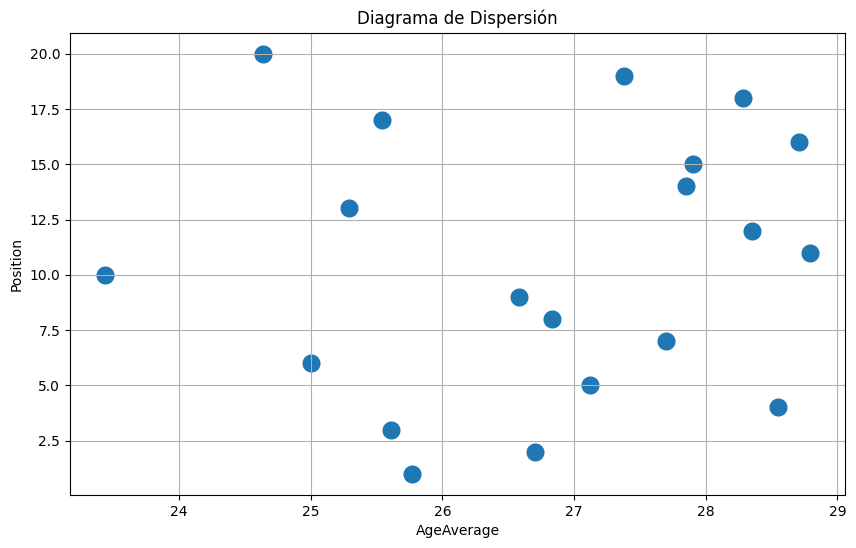

In [106]:
grafico_dispersion_con_correlacion(df_teams, "AgeAverage", "Position", 200)

In [123]:
df_gk.sort_values("saves", ascending = False).nunique()

,name,saves,cleanSheet,penaltySave,savedInsideBox,runsOut,team,age,ageCategory
0,Filip Jörgensen,72,2,0,49,3,Villarreal,21,young
1,Stole Dimitrievski,61,7,1,42,5,Rayo Vallecano,29,ideal
2,Álvaro Valles,56,4,0,31,13,Las Palmas,26,ideal
3,Paulo Gazzaniga,56,4,0,36,1,Girona FC,31,veteran
4,Unai Simón,56,7,1,36,9,Athletic Club,26,ideal
5,David Soria,56,7,0,37,14,Getafe,30,veteran
6,Jeremías Ledesma,55,2,0,34,8,Cádiz,30,veteran
7,Álex Remiro,54,5,0,34,10,Real Sociedad,28,ideal
8,Giorgi Mamardashvili,50,5,1,36,5,Valencia,23,young
9,André Ferreira,47,0,0,28,5,Granada,27,ideal


In [126]:
lista_gk = df_gk["name"].to_list()

In [127]:
lista_gk

['Filip Jörgensen',
 'Stole Dimitrievski',
 'Álvaro Valles',
 'Paulo Gazzaniga',
 'Unai Simón',
 'David Soria',
 'Jeremías Ledesma',
 'Álex Remiro',
 'Giorgi Mamardashvili',
 'André Ferreira',
 'Jan Oblak',
 'Predrag Rajković',
 'Antonio Sivera',
 'Luís Maximiano',
 'Marc-André ter Stegen',
 'Sergio Herrera',
 'Marko Dmitrović',
 'Iván Villar',
 'Kepa Arrizabalaga',
 'Rui Silva',
 'Vicente Guaita',
 'Andriy Lunin',
 'Claudio Bravo',
 'Ørjan Nyland',
 'Iñaki Peña',
 'Francisco Vieites',
 'David Gil',
 'Raúl Fernández',
 'Fernando Martínez',
 'Aitor Fernández',
 'Diego Mariño',
 'Bono',
 'Pepe Reina']

In [129]:
rating_gk = df_gen.loc[df_gen['name'].isin(lista_gk), 'rating'].tolist()

In [131]:
df_gk["rating"] = rating_gk

In [133]:
df_gk.drop(df_gk.index[-1])

,name,saves,cleanSheet,penaltySave,savedInsideBox,runsOut,team,age,ageCategory,rating
0,Filip Jörgensen,72,2,0,49,3,Villarreal,21,young,7.52
1,Stole Dimitrievski,61,7,1,42,5,Rayo Vallecano,29,ideal,7.41
2,Álvaro Valles,56,4,0,31,13,Las Palmas,26,ideal,7.36
3,Paulo Gazzaniga,56,4,0,36,1,Girona FC,31,veteran,7.34
4,Unai Simón,56,7,1,36,9,Athletic Club,26,ideal,7.31
5,David Soria,56,7,0,37,14,Getafe,30,veteran,7.30
6,Jeremías Ledesma,55,2,0,34,8,Cádiz,30,veteran,7.29
7,Álex Remiro,54,5,0,34,10,Real Sociedad,28,ideal,7.27
8,Giorgi Mamardashvili,50,5,1,36,5,Valencia,23,young,7.21
9,André Ferreira,47,0,0,28,5,Granada,27,ideal,7.20


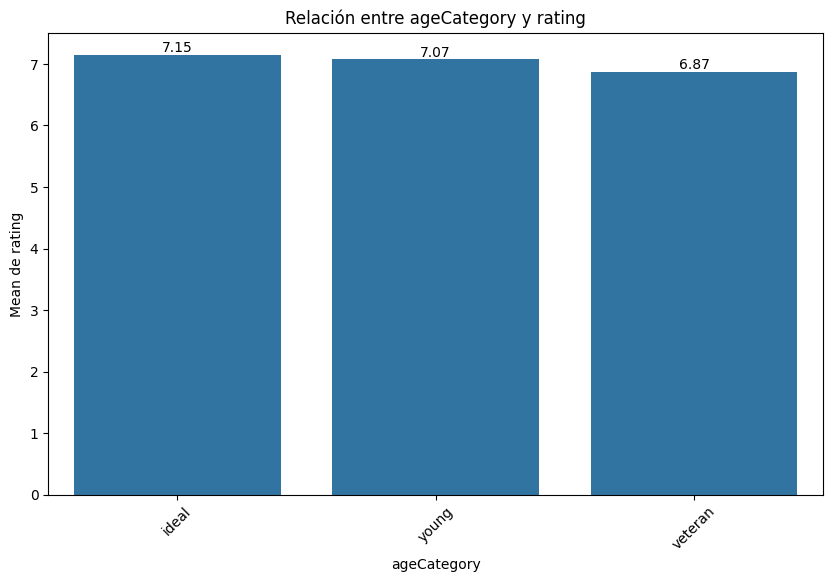

In [135]:
plot_categorical_numerical_relationship(df_gk.drop(df_gk.index[-1]), "ageCategory",  "rating", show_values=True)

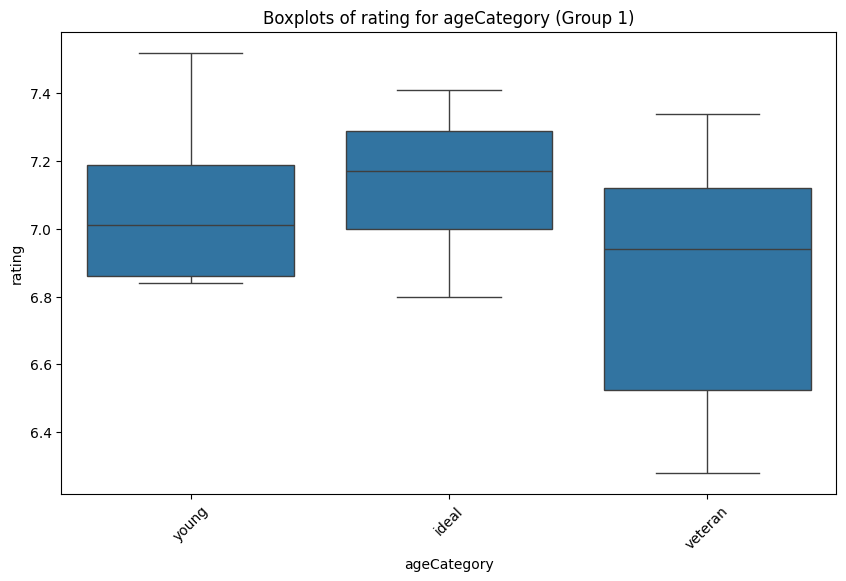

In [136]:
plot_grouped_boxplots(df_gk.drop(df_gk.index[-1]), "ageCategory", "rating")

In [137]:
df_gk_gen = df_gen.loc[df_gen['name'].isin(lista_gk)]

In [142]:
df_gk_gen.sort_values("rating", ascending = False)
df_gk_gen[["name", "rating"]].head(10)

,name,rating
8,Andriy Lunin,7.52
16,Álvaro Valles,7.41
19,Jeremías Ledesma,7.36
22,Filip Jörgensen,7.34
23,Álex Remiro,7.31
25,Vicente Guaita,7.30
27,Rui Silva,7.29
31,David Gil,7.27
46,Paulo Gazzaniga,7.21
49,Claudio Bravo,7.20
